# <font color = blue> LINEAR REGRESSION ASSIGNMENT </font>
    DHARINI P

### PROBLEM STATEMENT
- A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
- The company wants to know: 
    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 1.  IMPORTING AND UNDERSTANDING DATA

In [3]:
#importing dataset
df_car = pd.read_csv('CarPrice_Assignment.csv')
print(df_car.shape)

(205, 26)


In [4]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Retreiving column names
df_car.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

In [6]:
# Datatype inspection
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 2. DATA CLEANING

In [8]:
# Checkimg for null values in columns
df_car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### No missing values found in any of the columns

In [9]:
# Checkimg for null values in rows
df_car.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

##### No missing values found in any of the columns

In [10]:
# check for 1 unique value in column as when a column has only 1 unique value, it wont be useful for analysis
unique = df_car.nunique()
unique = unique[unique.values == 1]
print(unique.values)

[]


##### We do not have any column containing only one unique value

In [11]:
# check for duplicates
df_car.loc[df_car.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


- No duplicates found in our data

In [12]:
# check for special characters or irrelevant values in all the columns
for col in df_car:
    print (col, df_car[col].unique())

car_ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
symboling [ 3  1  2  0 -1 -2]
CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 

##### There are no special characters or any irrelevent entries as per my observation on column values in the dataframe

##### Data is clean without any null values, special characters and irrelevant entries

In [13]:
# EXTRACTING CARCOMPANY NAME FROM CARNAME COLUMN
company = df_car['CarName'].str.split(' ',n=1,expand=True)
df_car['CarCompany']=company[0]
df_car.drop(columns=['CarName'],inplace=True)
df_car['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- We have some invalid values in the car company list
    - maxda and mazda are the same
    - Nissan and nissan are the same
    - toyota and toyouta are the same
    - vokswagen, volkswagena and vw are same
    - porcshce and porsche are same
- We need to fix these values.

In [14]:
def invalid_fix(x,y):
    df_car['CarCompany'].replace(x,y,inplace=True)
    
invalid_fix('maxda','mazda')
invalid_fix('Nissan','nissan')
invalid_fix('toyouta','toyota')
invalid_fix('vokswagen','volkswagen')
invalid_fix('vw','volkswagen')
invalid_fix('porcshce','porsche')

In [15]:
df_car['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### DERIVED METRICS & BINNING

In [16]:
## FUELECONOMY CAN BE CALCULATED USING CITYMPG AND HIGHWAYMPG. 
##Ref link: https://www.fueleconomy.gov/FEG/label/learn-more-gasoline-label.shtml

df_car['fueleconomy'] = (0.55*df_car['citympg'])+(0.45*df_car['highwaympg'])

In [17]:
df_car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,fueleconomy
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,23.70
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,23.70
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.15
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,26.70
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,19.80


In [18]:
df_car['price'].quantile([0,.1, .25, .5, .75,1])

0.00     5118.0
0.10     6657.0
0.25     7788.0
0.50    10295.0
0.75    16503.0
1.00    45400.0
Name: price, dtype: float64

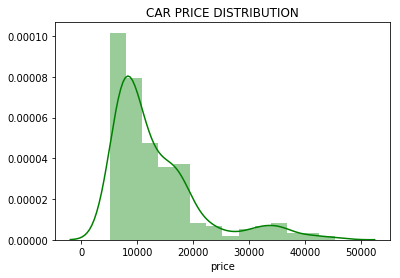

In [19]:
# DISTRIBUTION OF OUr TARGET VARIABLE 'price'
sns.distplot(df_car['price'],color='green')
plt.title('CAR PRICE DISTRIBUTION')
plt.show()

In [20]:
bins = [0, 15000, 30000, 45400]
slot = ['Low', 'Medium','High']
df_car['price_range'] = pd.cut(df_car['price'], bins, labels=slot)

In [21]:
df_car['price_range'].value_counts()

Low       141
Medium     49
High       15
Name: price_range, dtype: int64

In [22]:
df_car['price_range'] = df_car['price_range'].astype('object')
df_car['price_range'].dtype

dtype('O')

- Plot is right skewed
- Most of the cars are priced below 10000
- highend cars are sold relatively smaller in number
- Low and medium range cars have been sold out in maximum numbers

### 3. DATA VISUALISATION



#### UNIVARIATE ANALYSIS

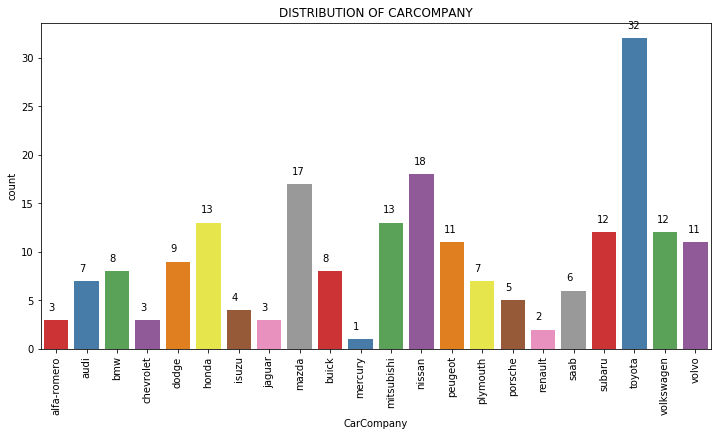

In [23]:
# DISTRIBUTION OF CAR COMPANIES
plt.figure(figsize=(12,6))
ax = sns.countplot(x='CarCompany',data=df_car,palette='Set1')
plt.xticks(rotation='vertical')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('DISTRIBUTION OF CARCOMPANY')
plt.show()

##### OBSERVATION
- The above plot clearly shows that TOYOTA has been  most preferred vehicle make in the americal market, followed by Nissan and mazda.

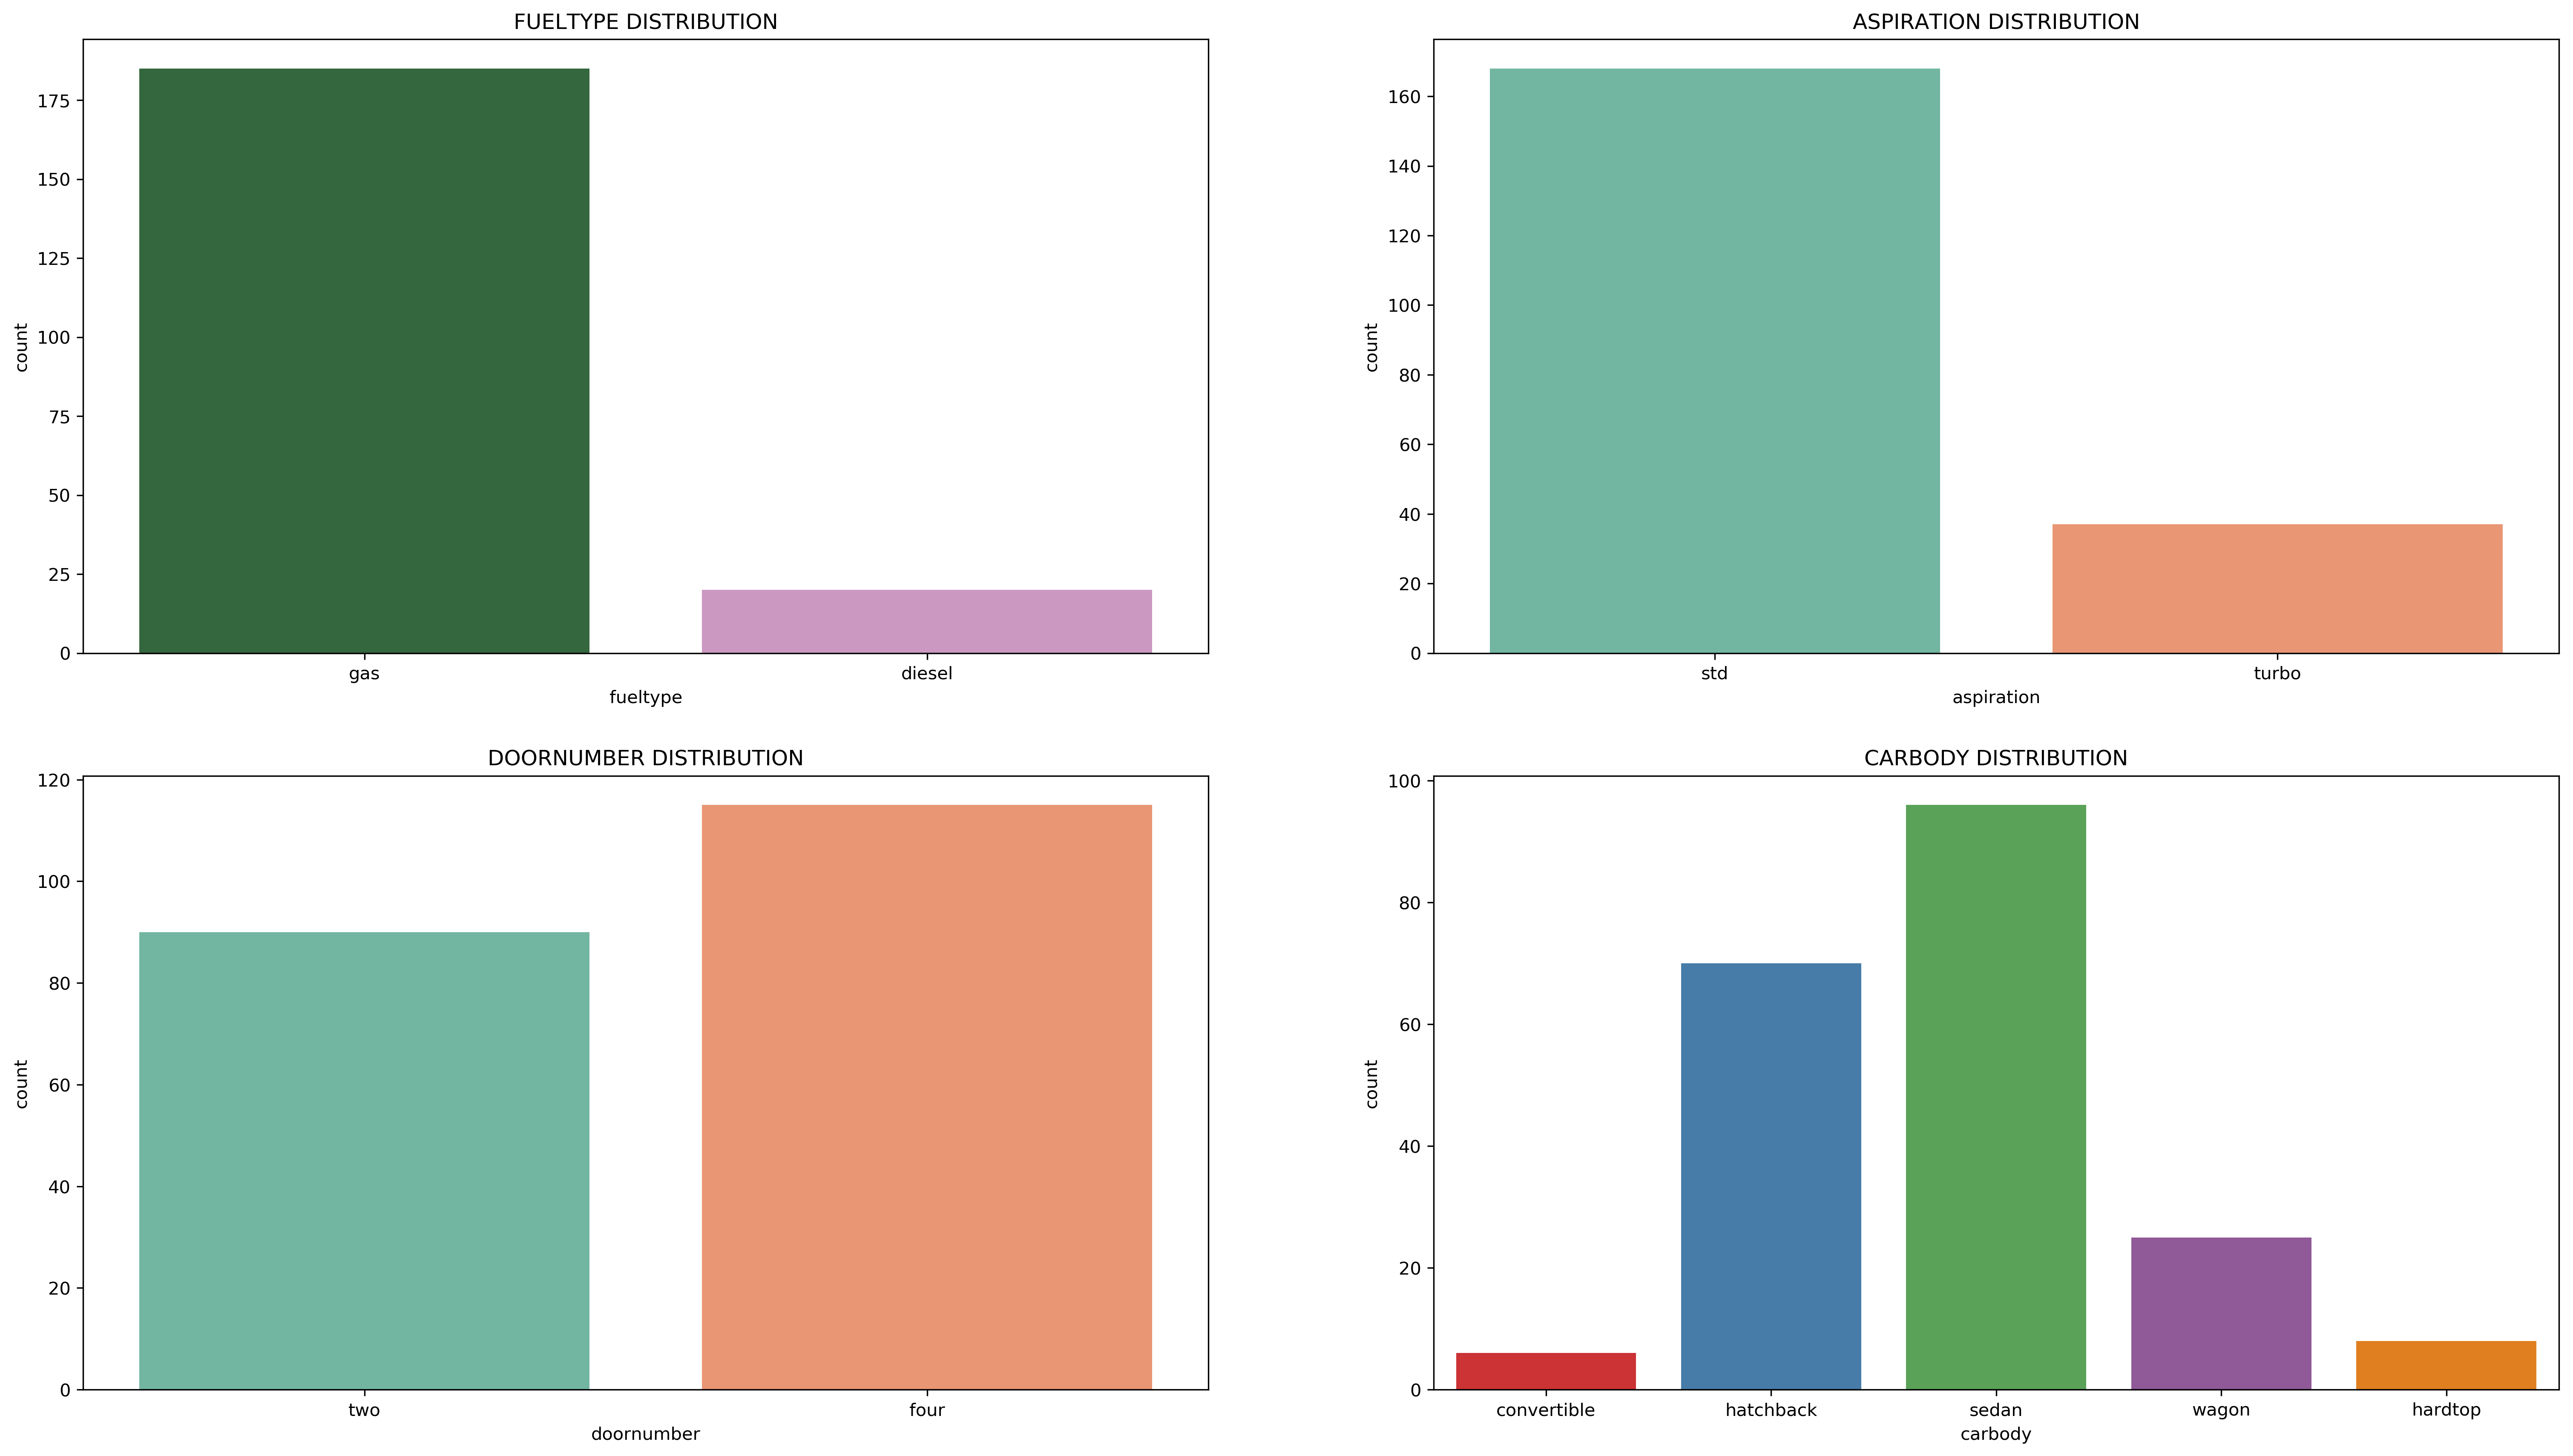

In [24]:
plt.figure(figsize=(25, 14),dpi=300)
plt.subplot(2,2,1)
sns.countplot(x = 'fueltype', data = df_car,palette='cubehelix')
plt.title('FUELTYPE DISTRIBUTION')
plt.subplot(2,2,2)
sns.countplot(x = 'aspiration', data = df_car,palette='Set2')
plt.title('ASPIRATION DISTRIBUTION')
plt.subplot(2,2,3)
sns.countplot(x = 'doornumber', data = df_car,palette='Set2')
plt.title('DOORNUMBER DISTRIBUTION')
plt.subplot(2,2,4)
sns.countplot(x = 'carbody', data = df_car,palette='Set1')
plt.title('CARBODY DISTRIBUTION')
plt.show()

##### OBSERVATION
   - Cars with fuel type "GAS" is more than 'DIESEL"
   - Aspiration type 'std' is used in most cars than turbo
   - Most of the cars have four doors. Gud number of cars have 2 doors aswell.
   - SEDAN has turned out to be the most preferred car type, follwed by hatchback. Other types have been preferred by small popolation only

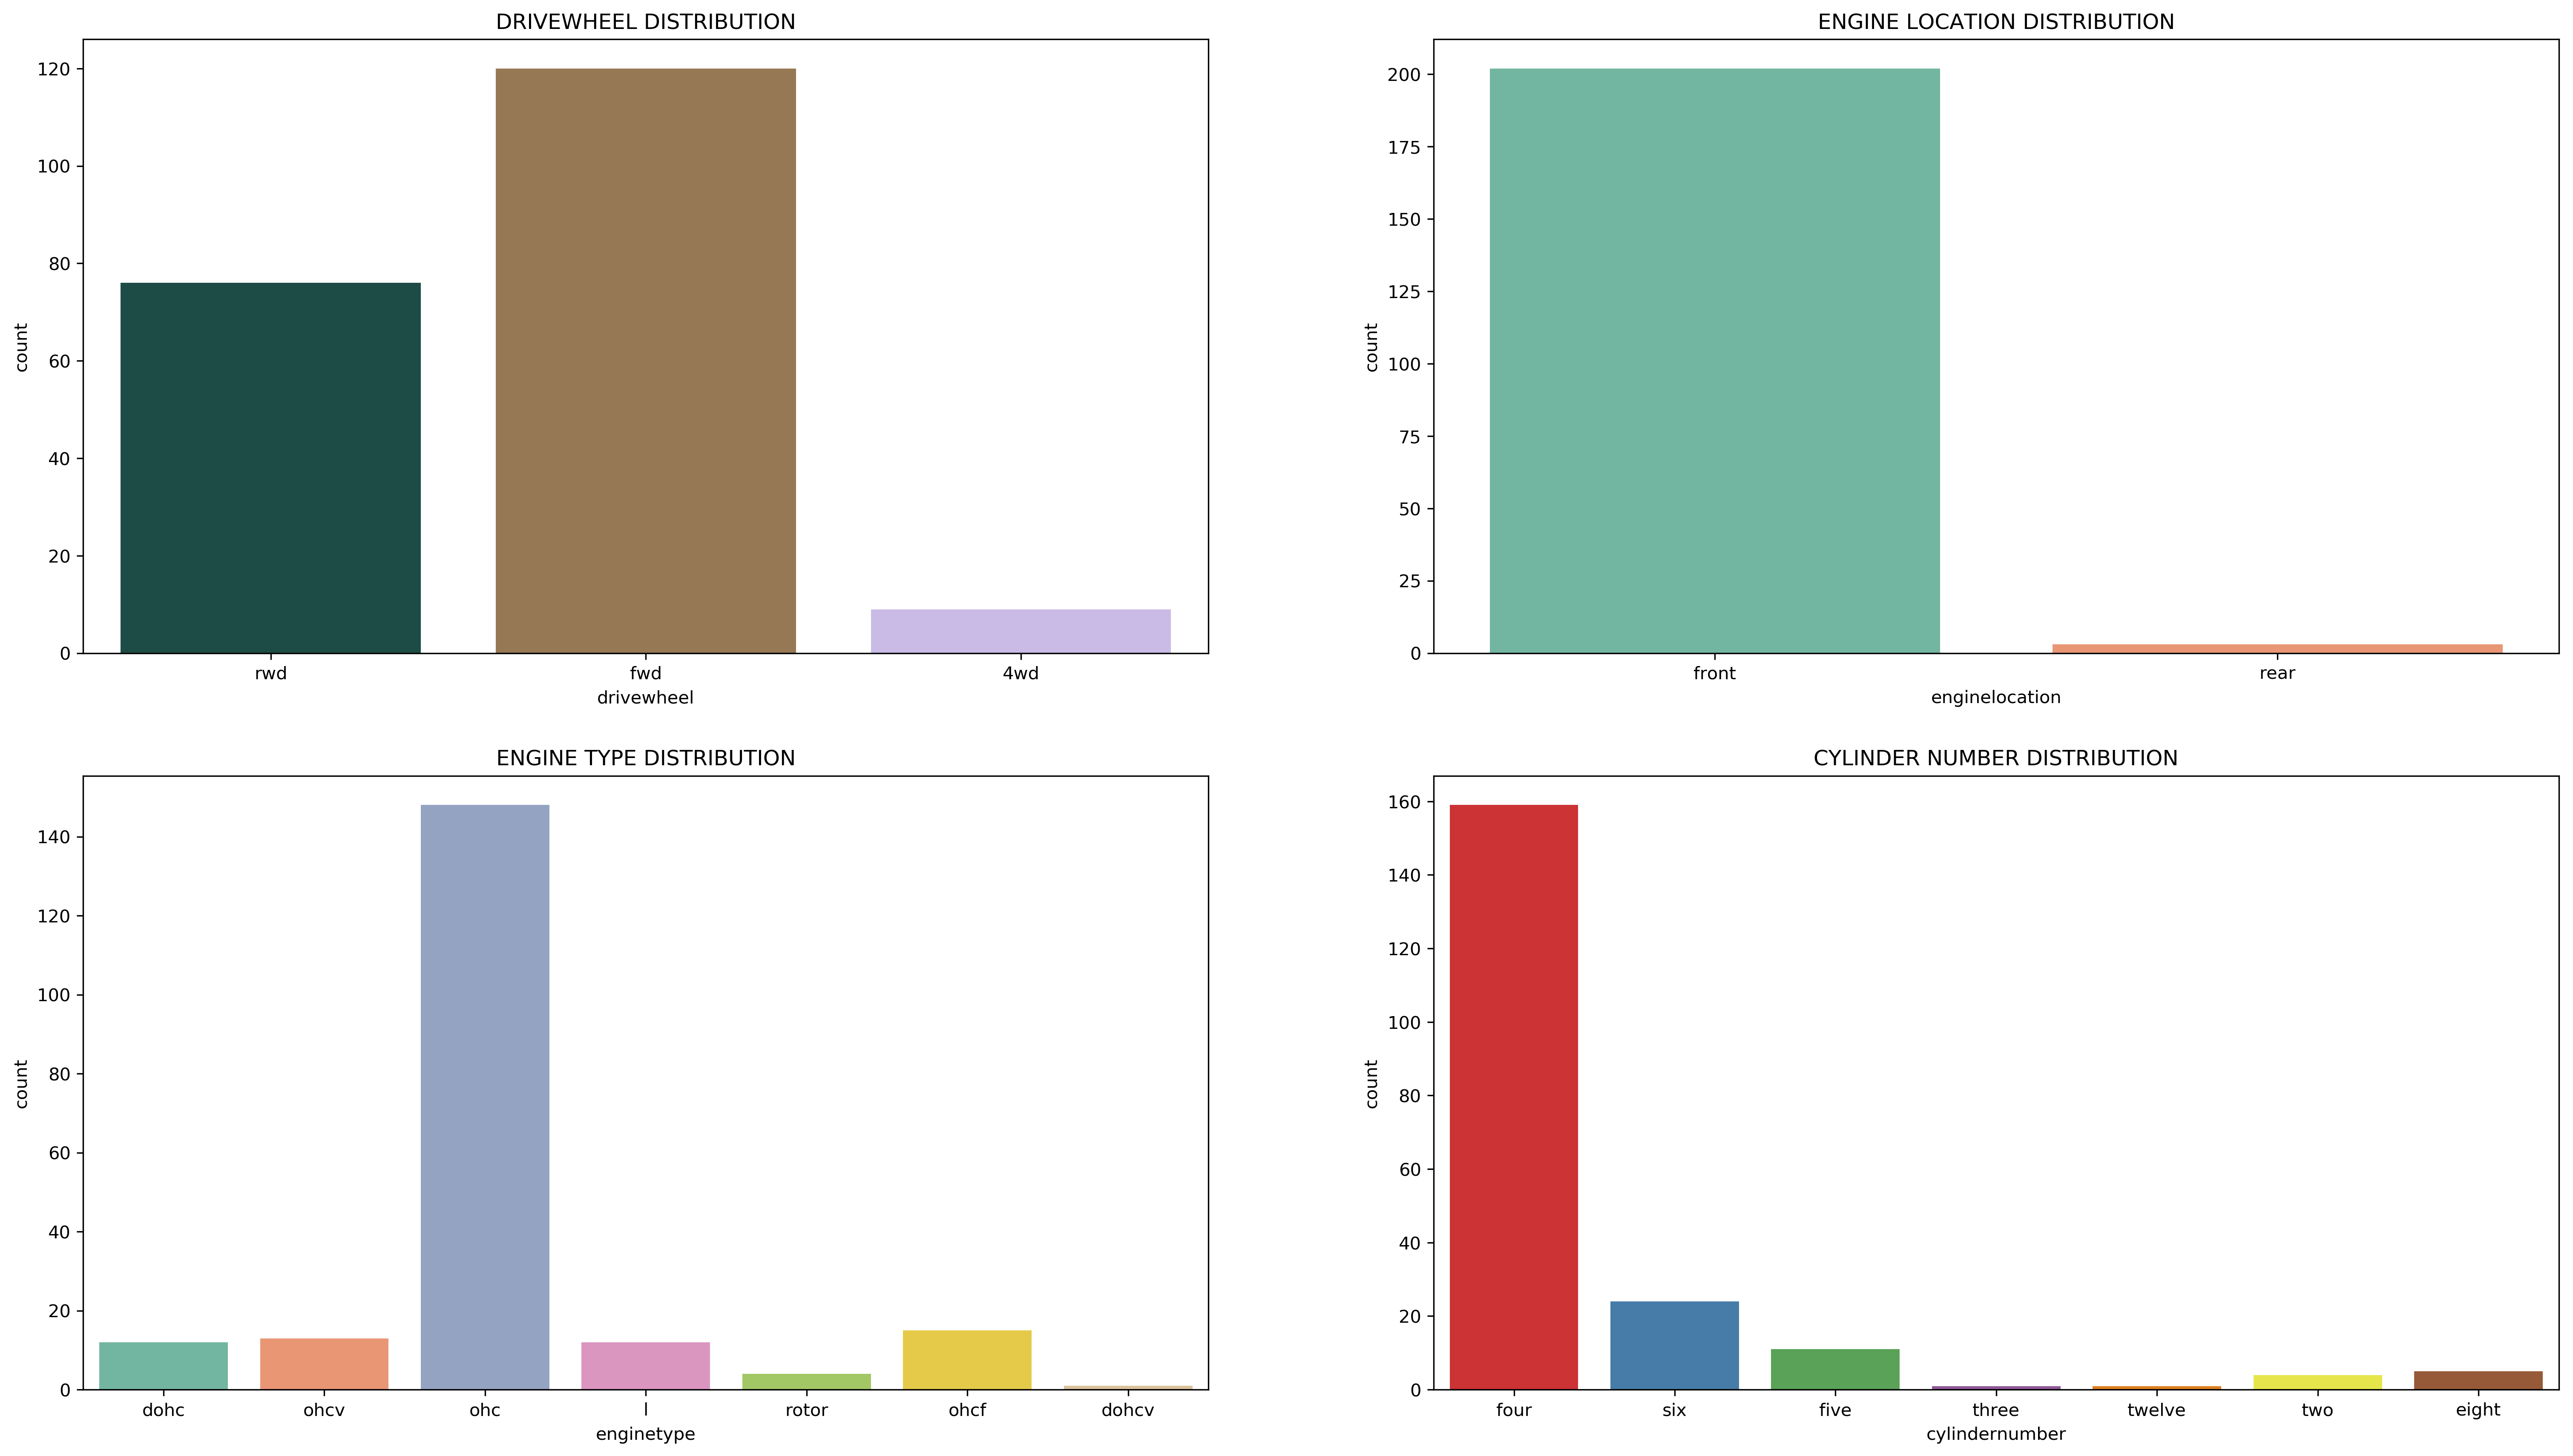

In [25]:
plt.figure(figsize=(25, 14),dpi=300)
plt.subplot(2,2,1)
sns.countplot(x = 'drivewheel', data = df_car,palette='cubehelix')
plt.title('DRIVEWHEEL DISTRIBUTION')
plt.subplot(2,2,2)
sns.countplot(x = 'enginelocation', data = df_car,palette='Set2')
plt.title('ENGINE LOCATION DISTRIBUTION')
plt.subplot(2,2,3)
sns.countplot(x = 'enginetype', data = df_car,palette='Set2')
plt.title('ENGINE TYPE DISTRIBUTION')
plt.subplot(2,2,4)
sns.countplot(x = 'cylindernumber', data = df_car,palette='Set1')
plt.title('CYLINDER NUMBER DISTRIBUTION')
plt.show()

##### OBSERVATION
   - Type of drive wheel in most of teh cars is fwd, followed by rwd & 4wd
   - Engine is located in the front in most of the cars
   - Engine type in almost all the car is 'OHC'. Other types have been used in cars in less percentage
   - Cylinder number preferred in most of teh cars is 4, follwed by other numbers

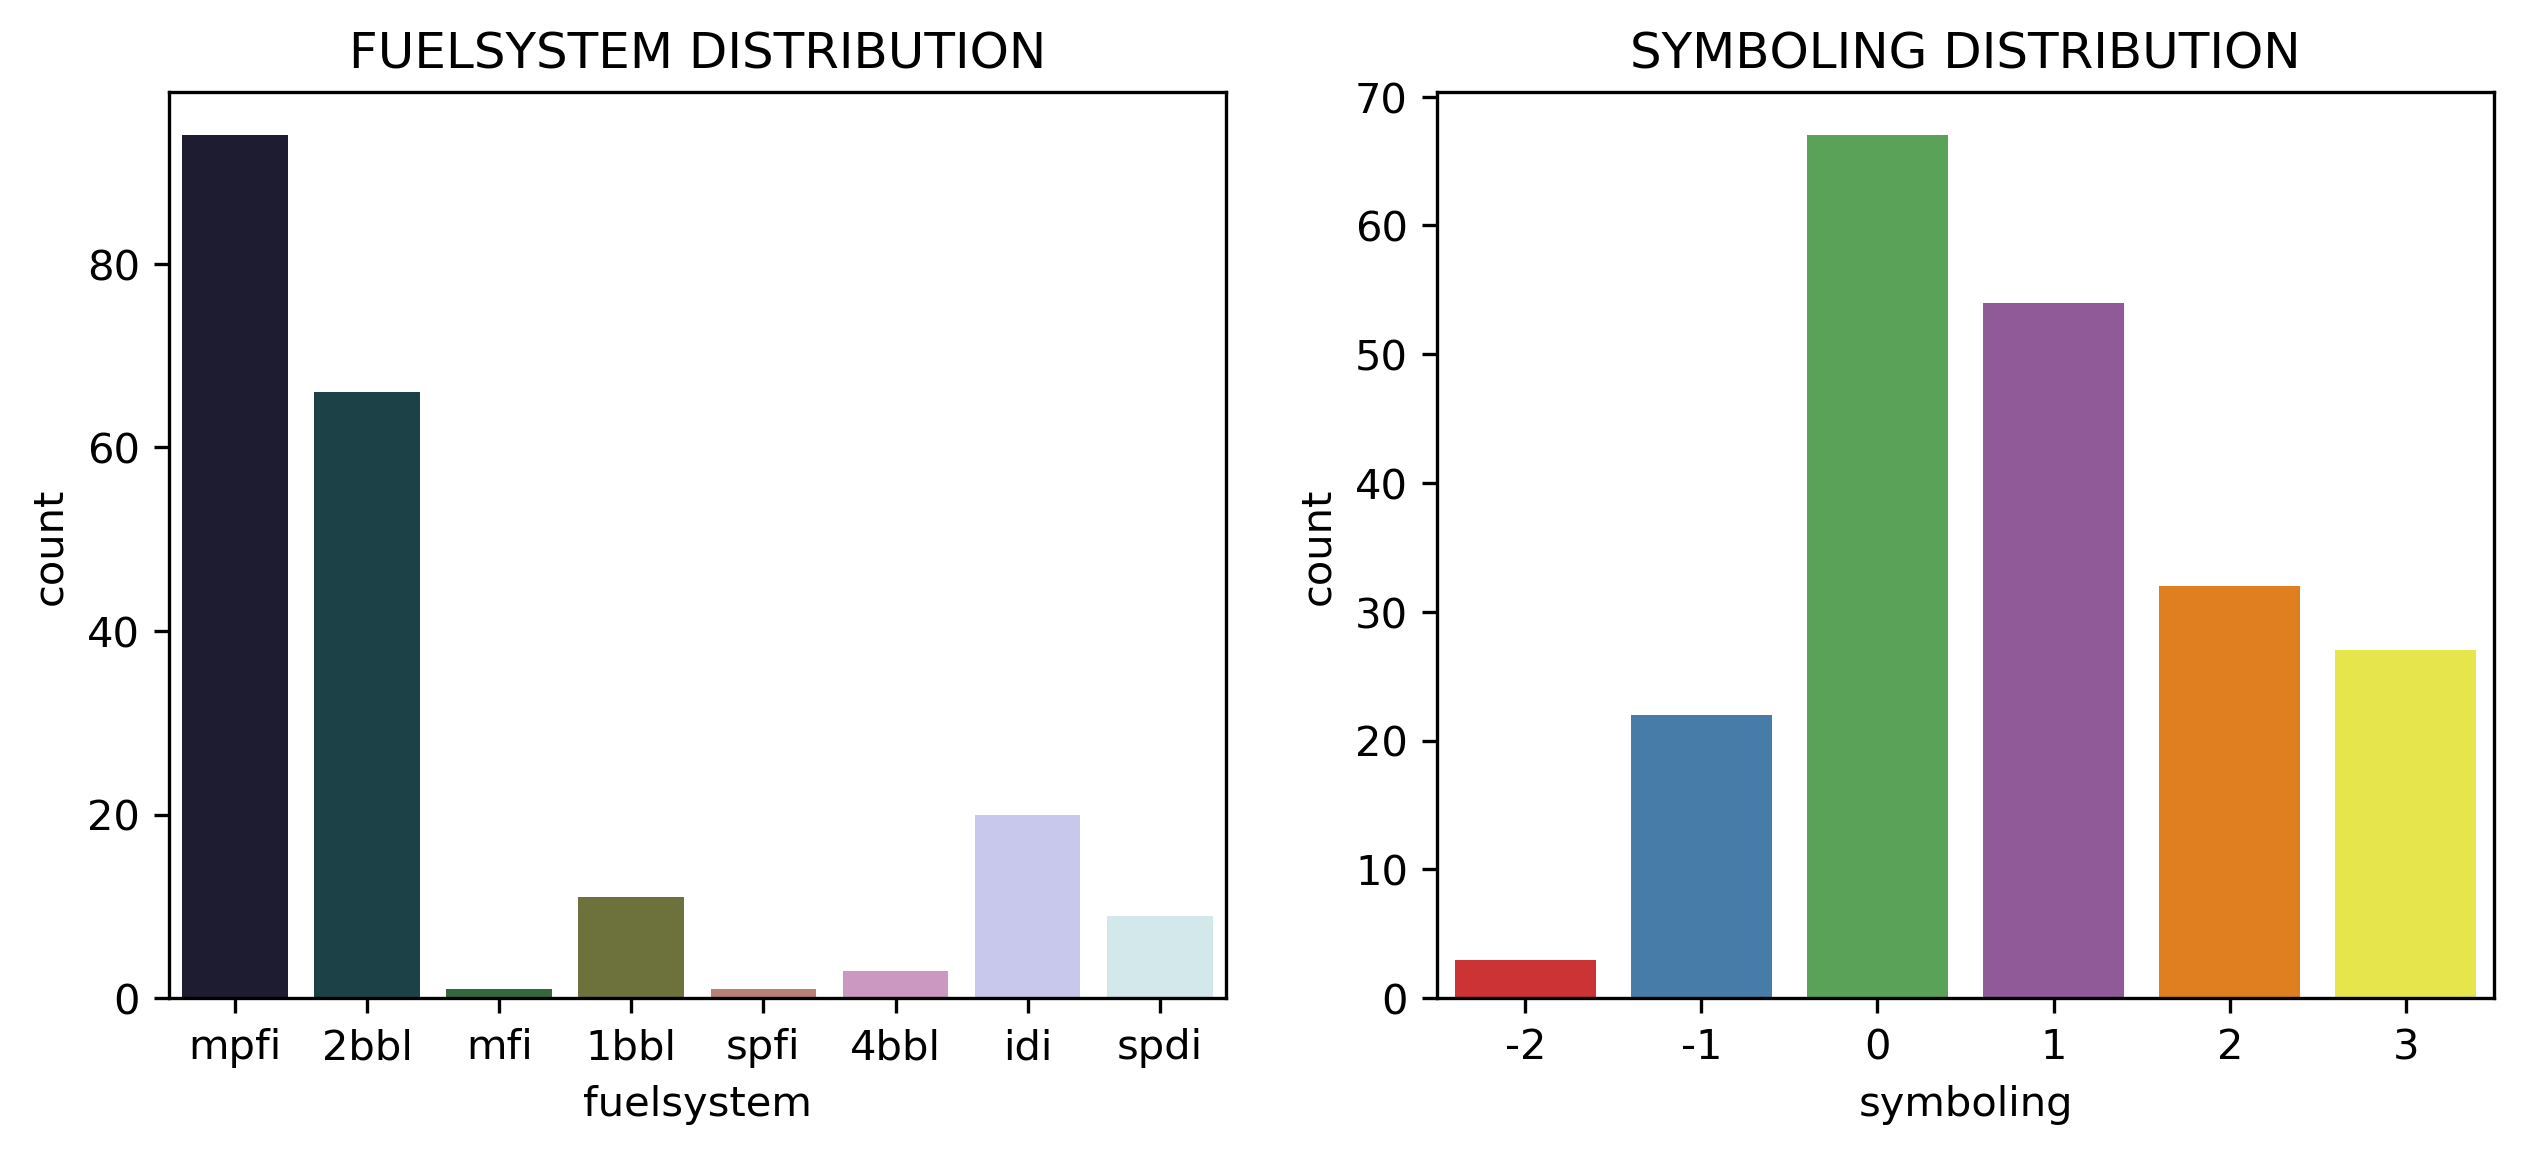

In [26]:
plt.figure(figsize=(10, 4),dpi=300)
plt.subplot(1,2,1)
sns.countplot(x = 'fuelsystem', data = df_car,palette='cubehelix')
plt.title('FUELSYSTEM DISTRIBUTION')
plt.subplot(1,2,2)
sns.countplot(x = 'symboling', data = df_car,palette='Set1')
plt.title('SYMBOLING DISTRIBUTION')
plt.show()

##### OBSERVATION
   - Most preferred fuel system is mpfi and 2bbl.
   - Cars with insurance rating 0 and 1 has been preferred the most

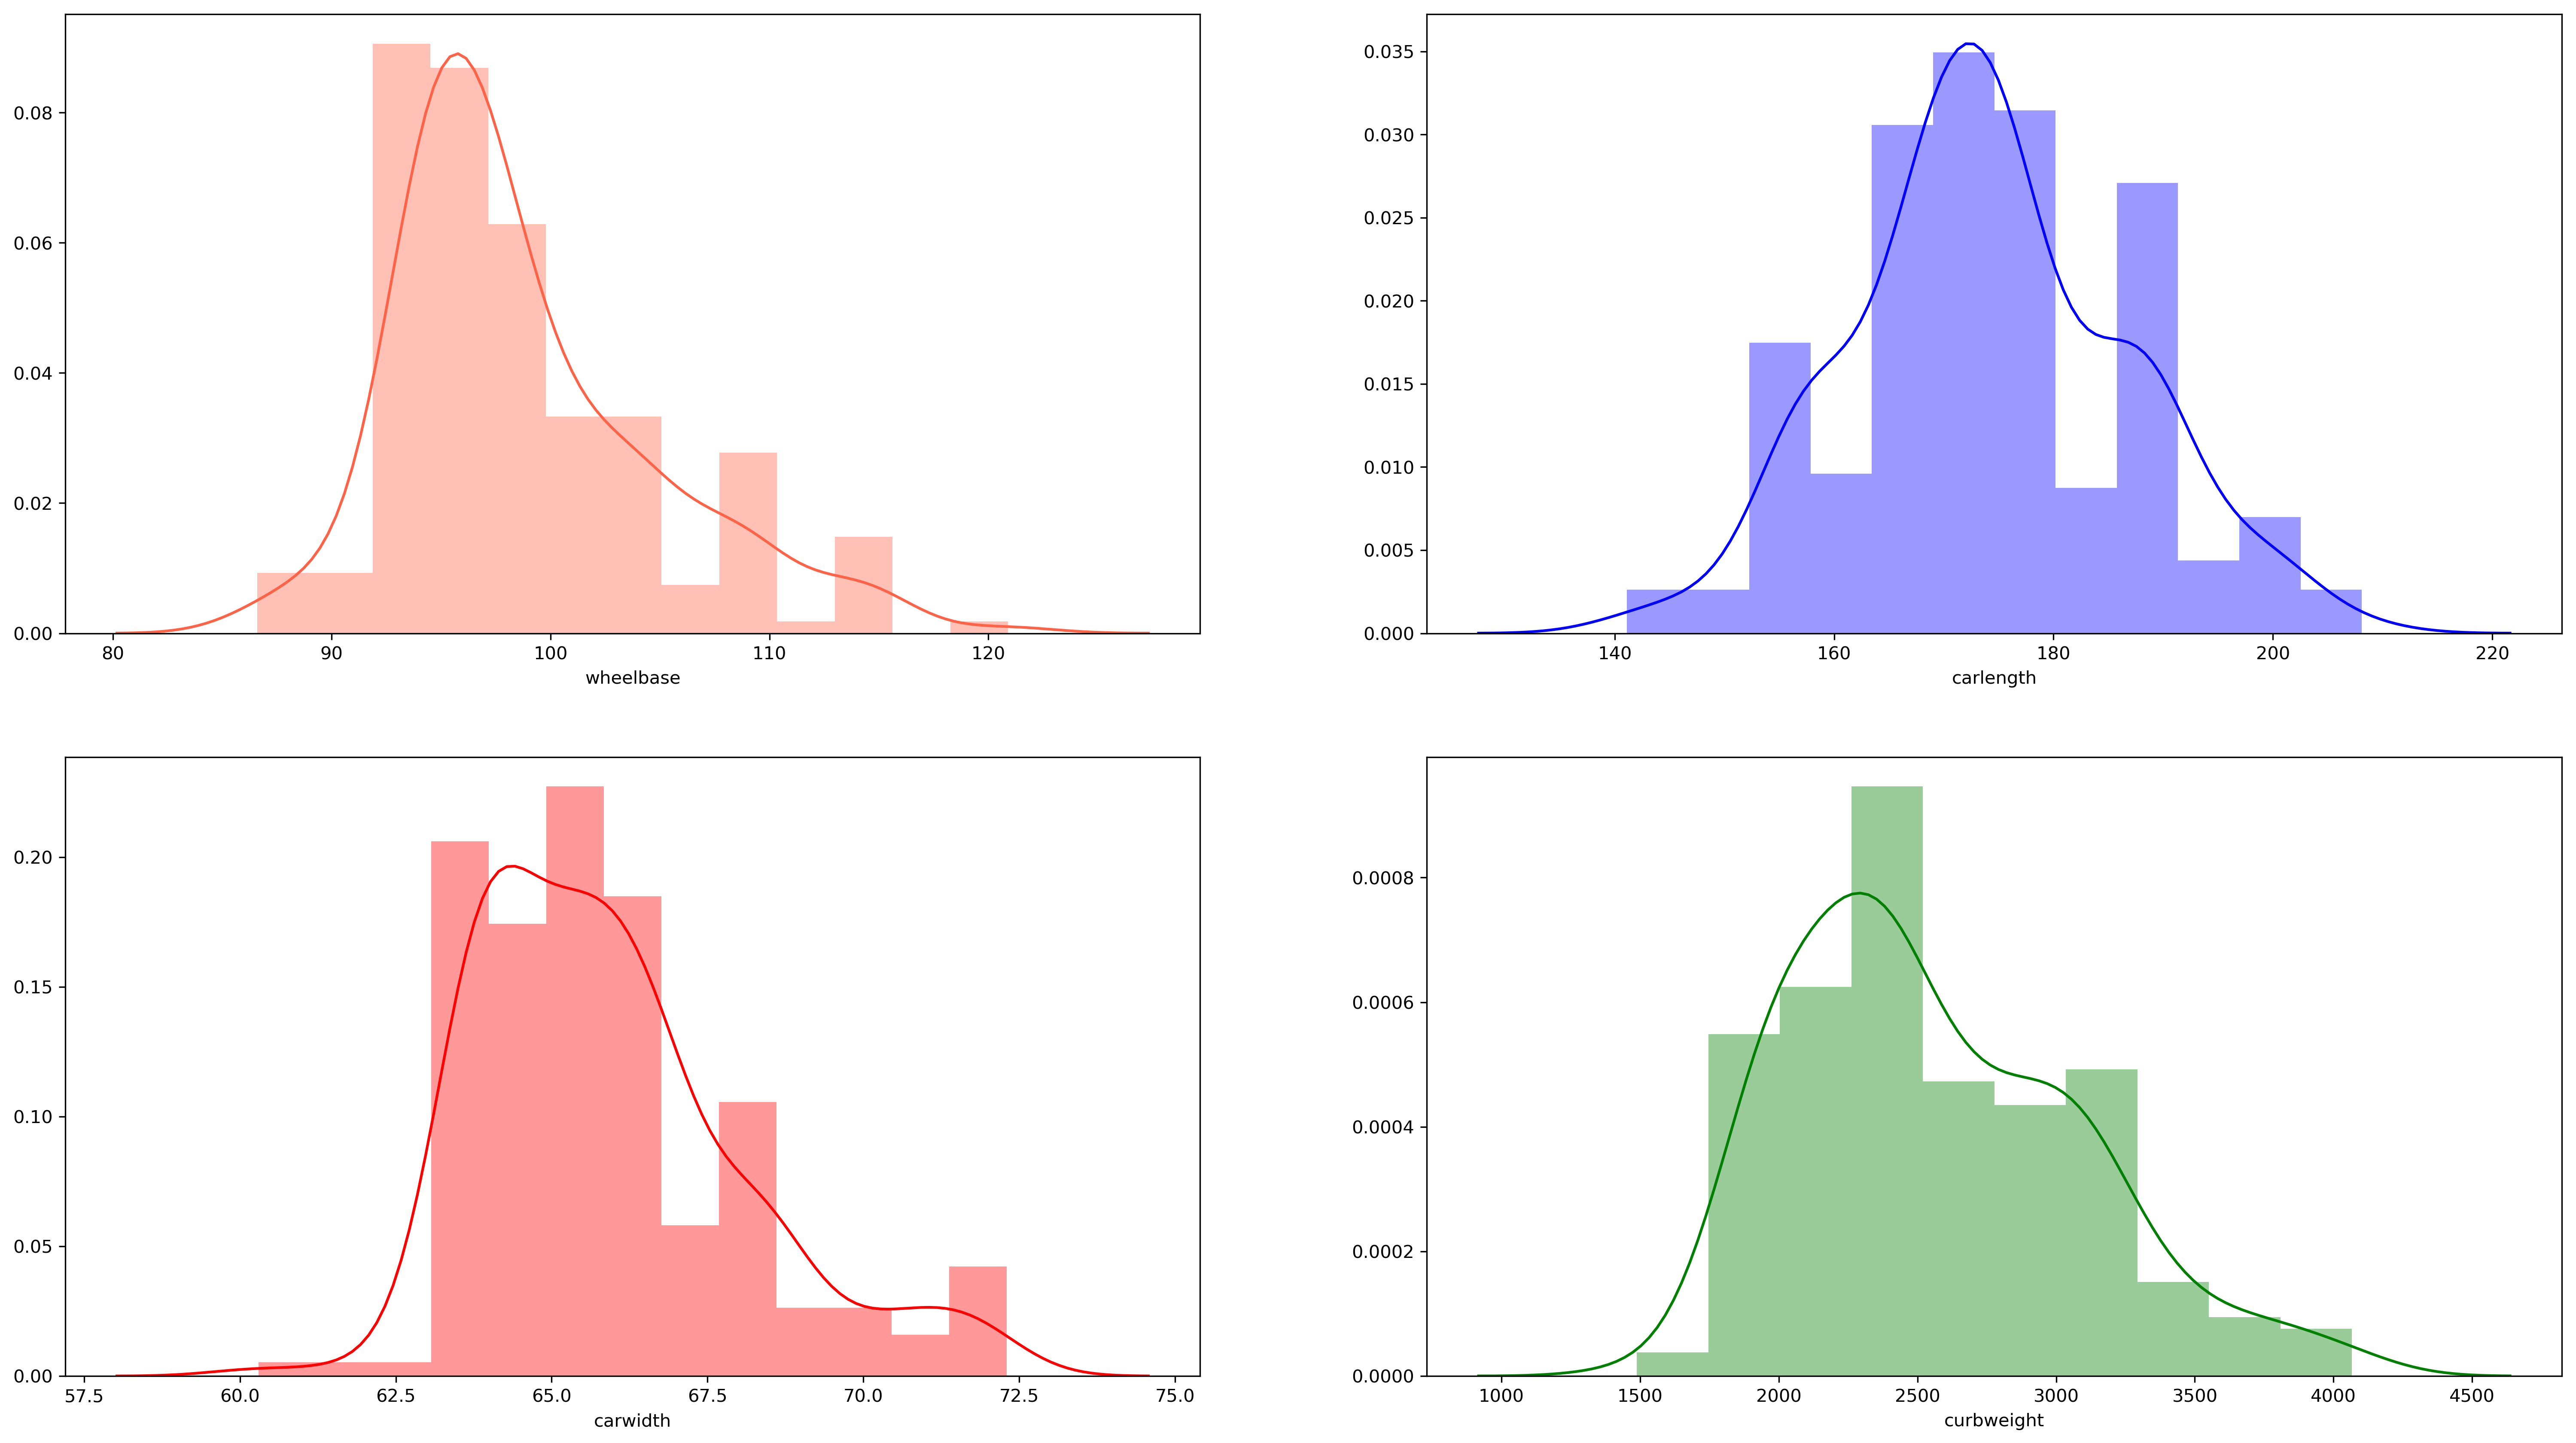

In [27]:
plt.figure(figsize=(25, 14),dpi=300)
plt.subplot(2,2,1)
sns.distplot(df_car['wheelbase'],color='tomato')
plt.subplot(2,2,2)
sns.distplot(df_car['carlength'],color='blue')
plt.subplot(2,2,3)
sns.distplot(df_car['carwidth'],color='red')
plt.subplot(2,2,4)
sns.distplot(df_car['curbweight'],color='green')
plt.show()

- Wheelbase is distributed between 90 and 100
- carlength is almost normally distributed
- carwidth is distributed between 66 to 66
- curbweight is distributed between 1500 and 4000

#### BIVARIATE ANALYSIS

In [28]:
df_car_cor = df_car.corr()

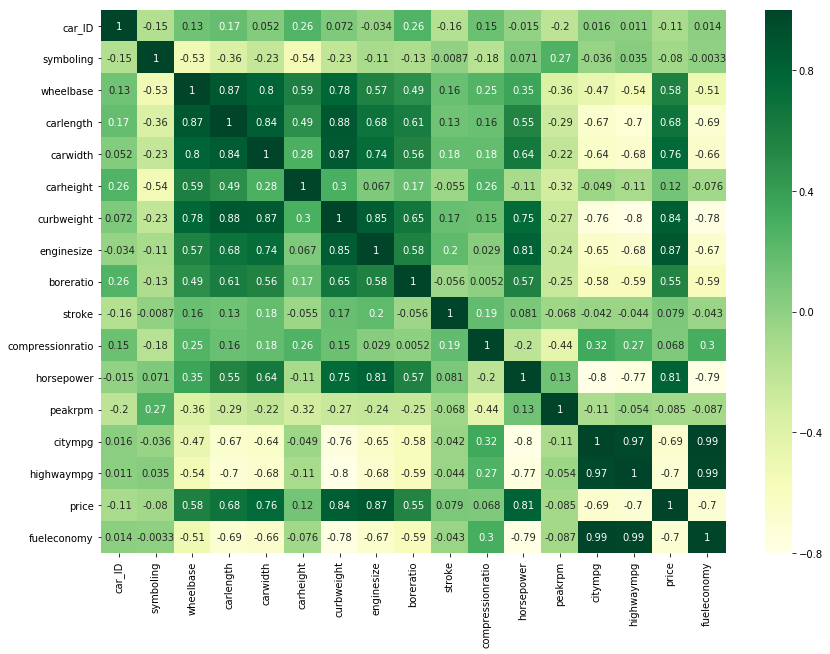

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(df_car_cor,annot=True,cmap='YlGn')

- From the above heatmap, high coorelation exists between below variables, which should be taken into accound to avoid multi-collinearity
    - citympg and highwaympg
    - wheelbase with curbweight,carlength and carwidth
    - enginesize with horsepower,carwidth,curbweigh

In [30]:
def pairplot(a,b,c,d):
    sns.pairplot(df_car,x_vars=[a,b,c,d],y_vars='price',kind='scatter', palette="Set2",hue='price_range')
    plt.show()

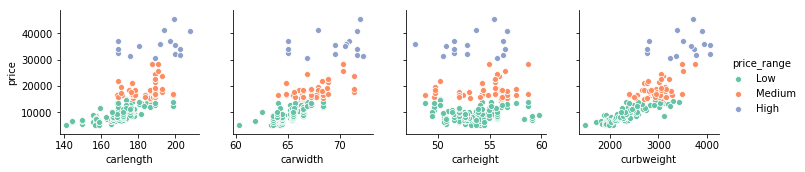

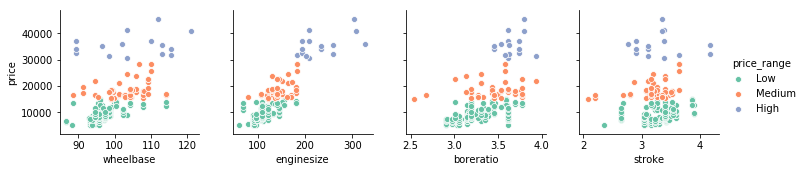

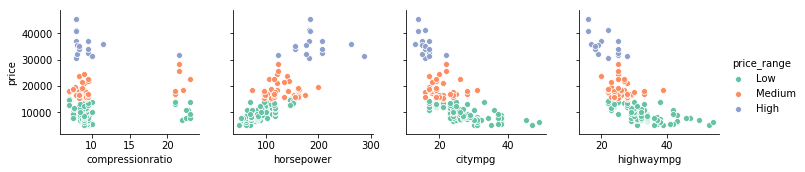

In [31]:
pairplot('carlength','carwidth','carheight','curbweight')
pairplot('wheelbase','enginesize','boreratio','stroke')
pairplot('compressionratio','horsepower','citympg','highwaympg')

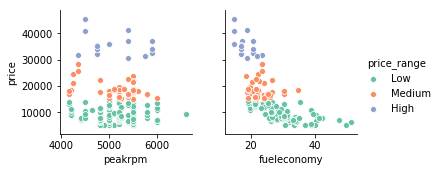

In [32]:
sns.pairplot(df_car,x_vars=['peakrpm','fueleconomy'],y_vars='price',kind='scatter', palette="Set2",hue='price_range')

##### INFERENCES:
1. From the heap map and pairplot, its evident that below variables have high positive coorelation with price
    - enginesize
    - curbweight
    - horsepower
    - carwidth
    - carlength
    - wheelbase
    - boreratio
2. High negative correlation exists between variables citympg, highwaympg,fueleconomy and price

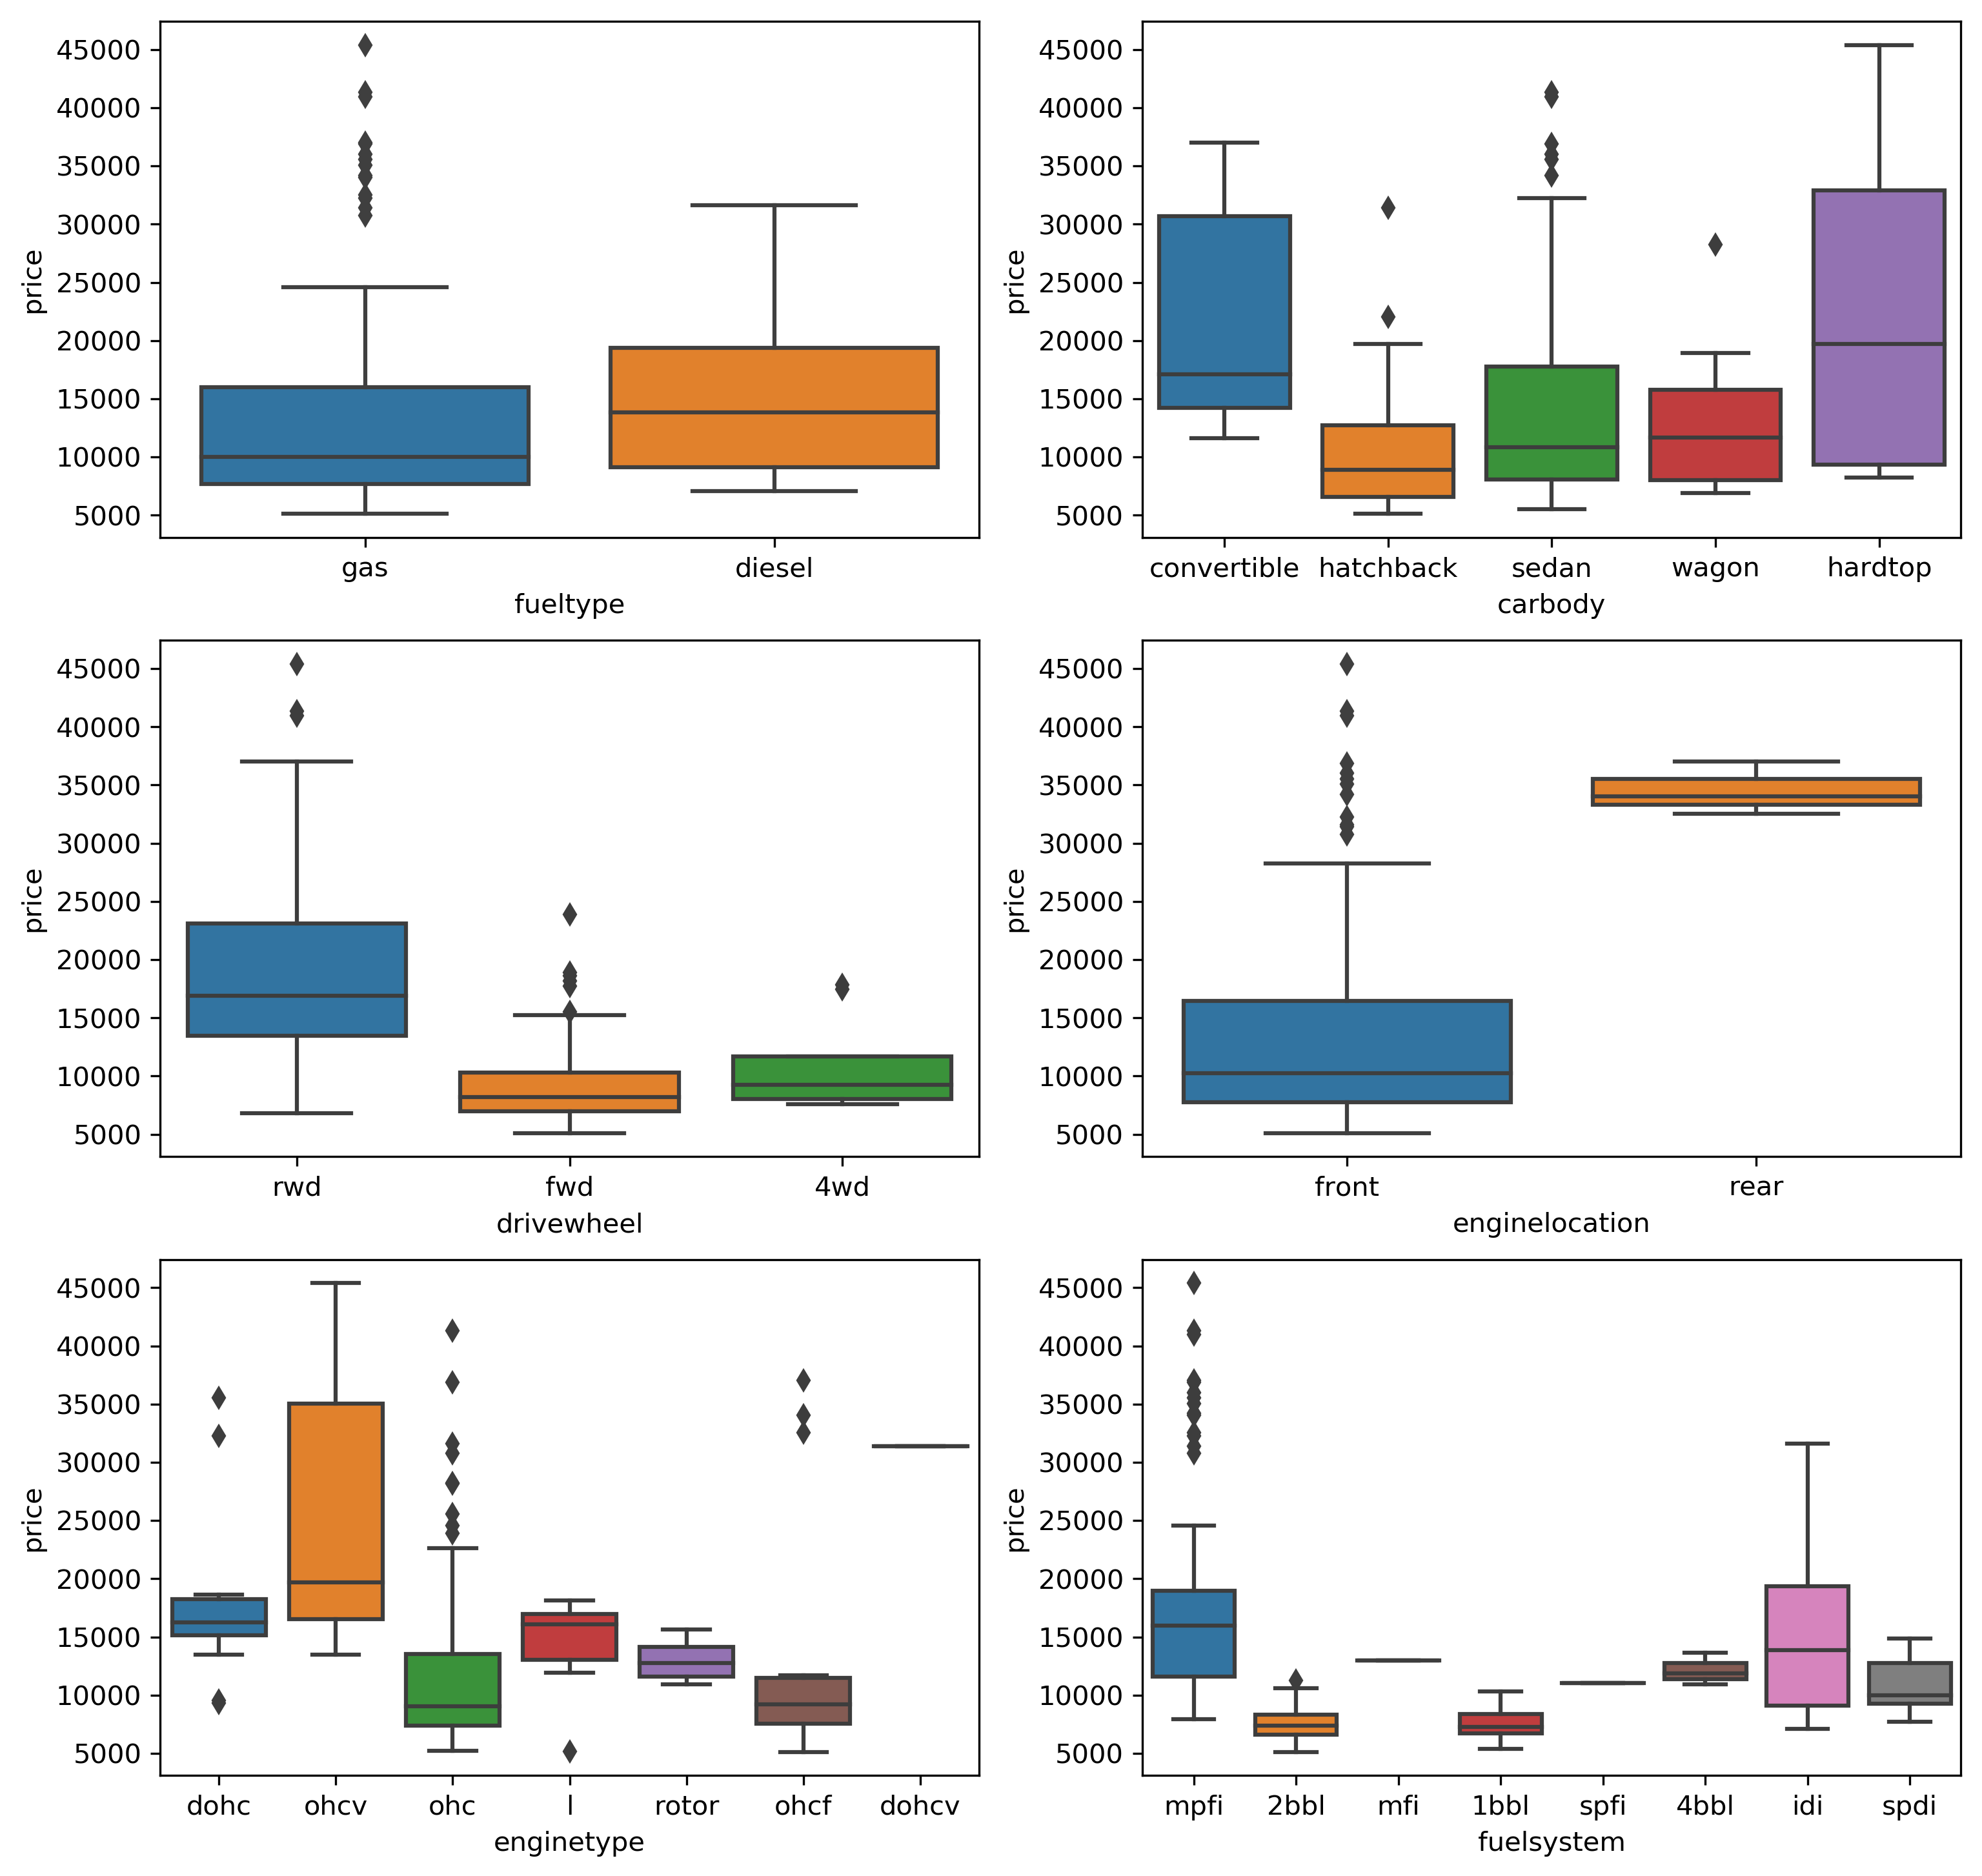

In [33]:
plt.figure(figsize=(12, 12),dpi=300)
plt.subplot(3,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df_car)
plt.subplot(3,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = df_car)
plt.subplot(3,2,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_car)
plt.subplot(3,2,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_car)
plt.subplot(3,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = df_car)
plt.subplot(3,2,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_car)
plt.show()

##### INFERENCES:
- cars with diesel engine is priced more than gas
- Hardtop and convertibles are priced more than other carbody types
- Drive wheel with rwdtype is priced higher
- Rear engine type is priced more than front engine
- ohcv engine type has the highest price range. ohc and ohcf has the lowest price range
- mpfi and idi fuel system is costlier than the rest

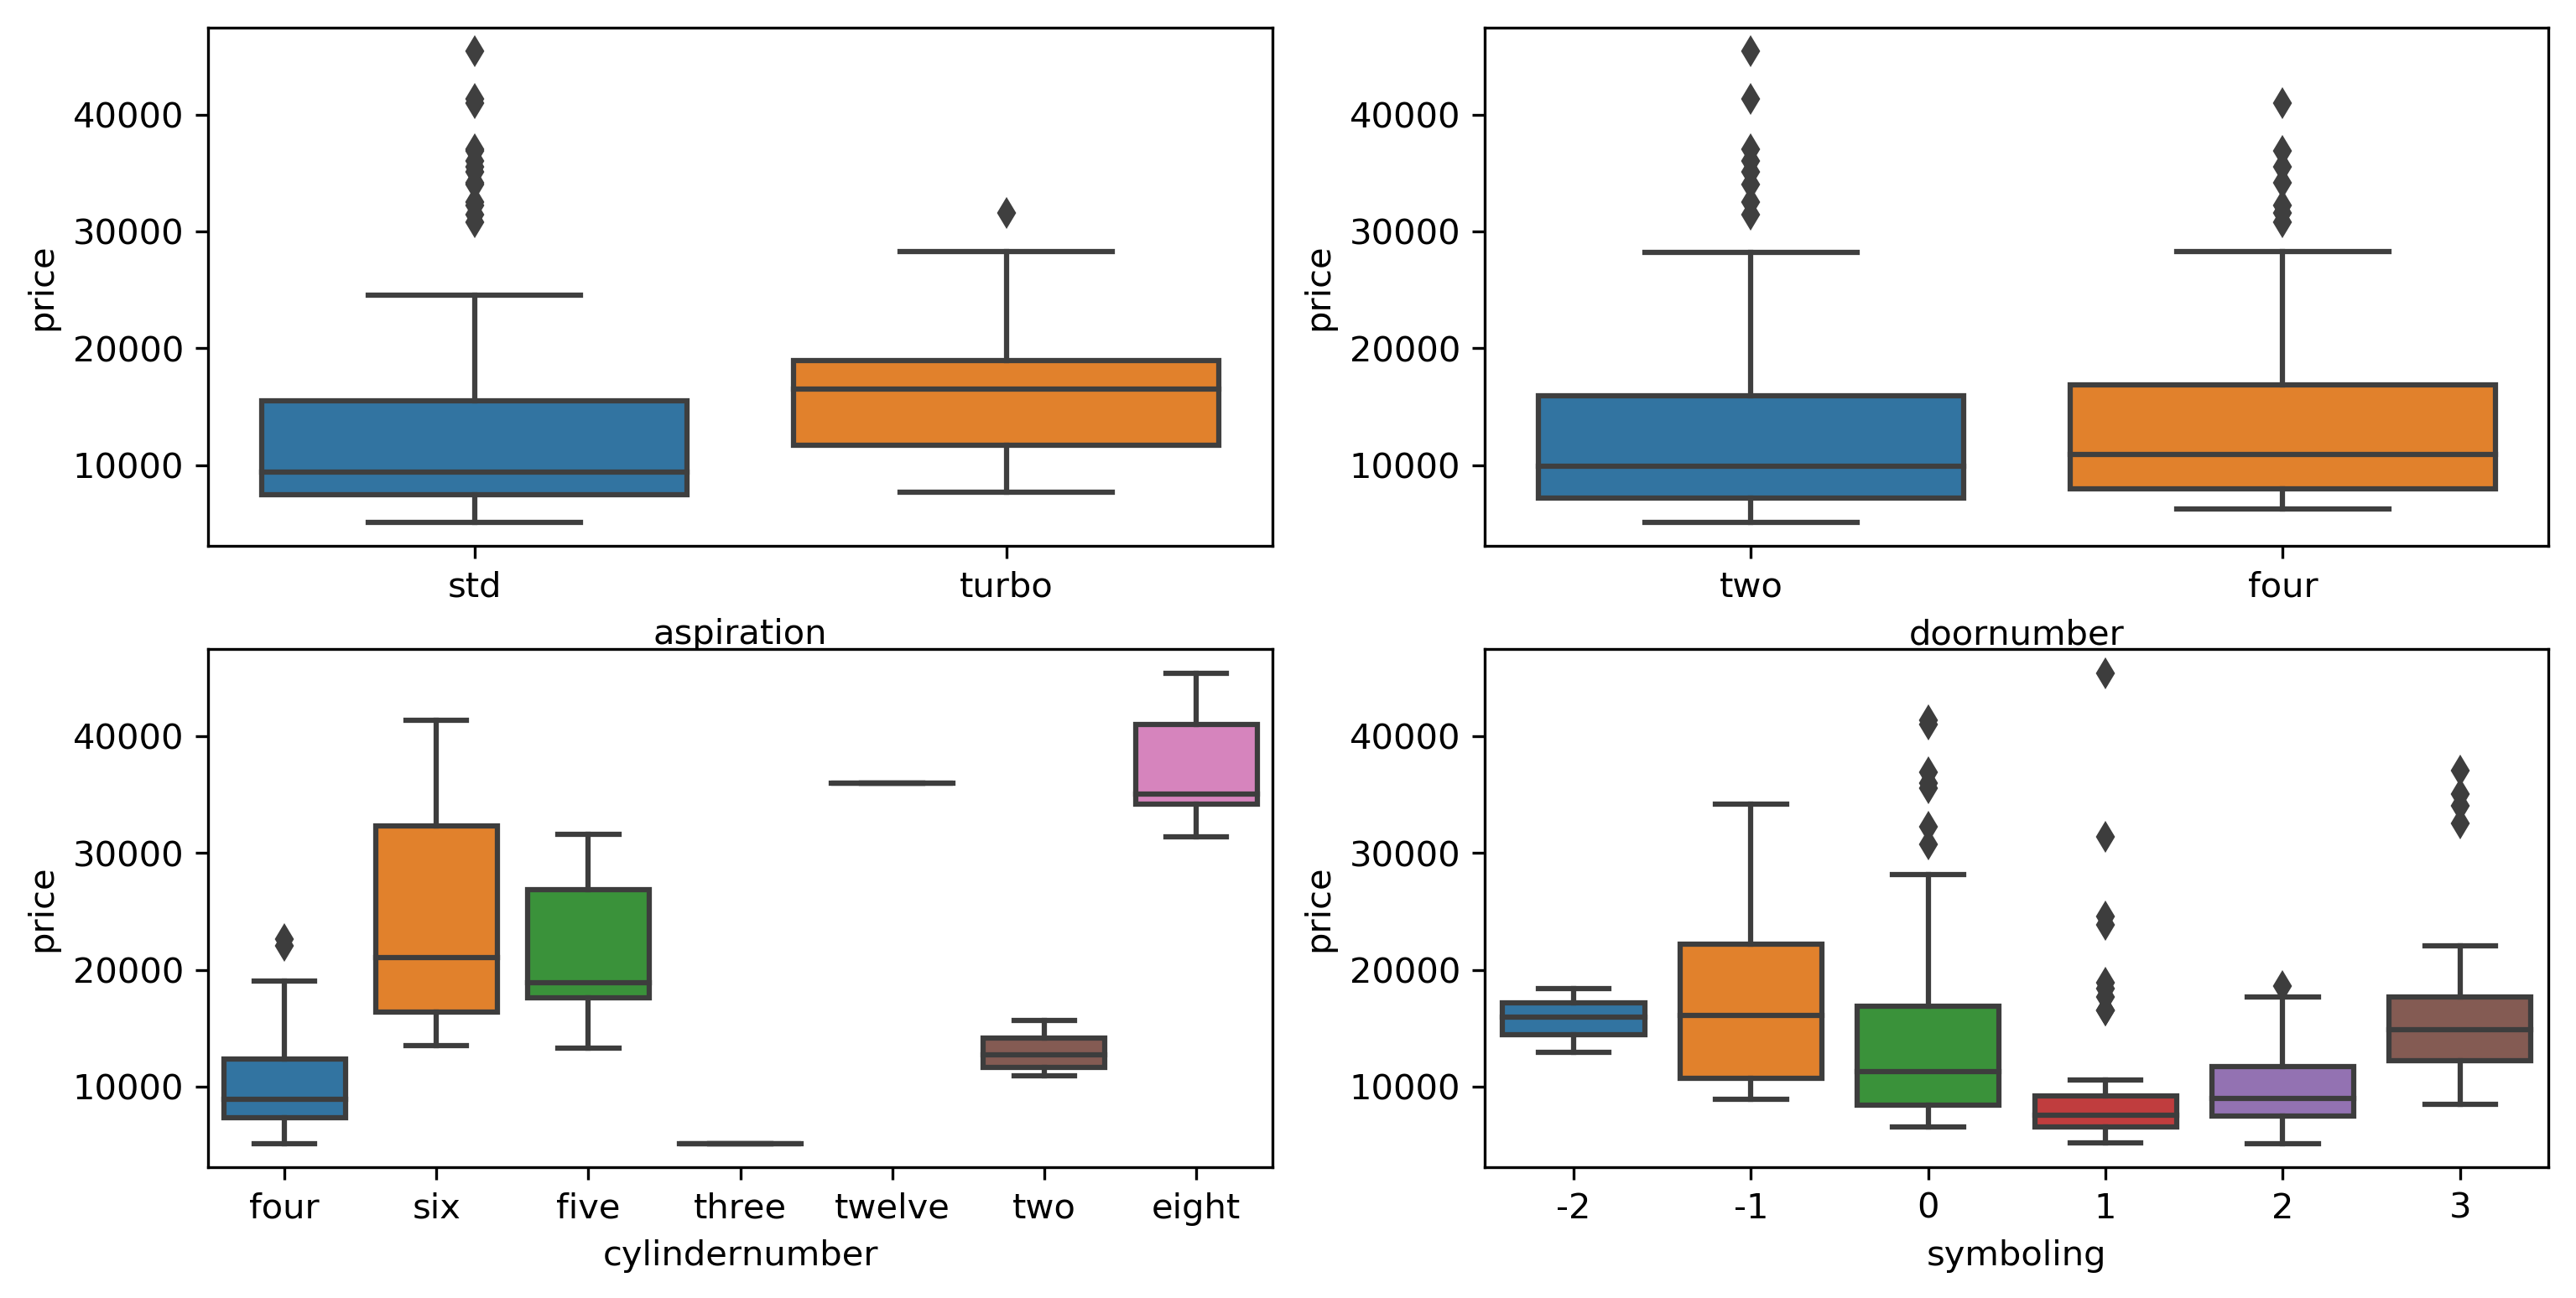

In [34]:
plt.figure(figsize=(12, 6),dpi=300)
plt.subplot(2,2,1)
sns.boxplot(x = 'aspiration', y = 'price', data = df_car)
plt.subplot(2,2,2)
sns.boxplot(x = 'doornumber', y = 'price', data = df_car)
plt.subplot(2,2,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_car)
plt.subplot(2,2,4)
sns.boxplot(x = 'symboling', y = 'price', data = df_car)
plt.show()

#### INFERENCES:
- Turbo aspiration is proced higher than the standard one
- No significant difference in the proce range of door numbers
- More the number of cylinders,higher the price
- -1 insurance rating is costlier than the rest, as its safety level is more

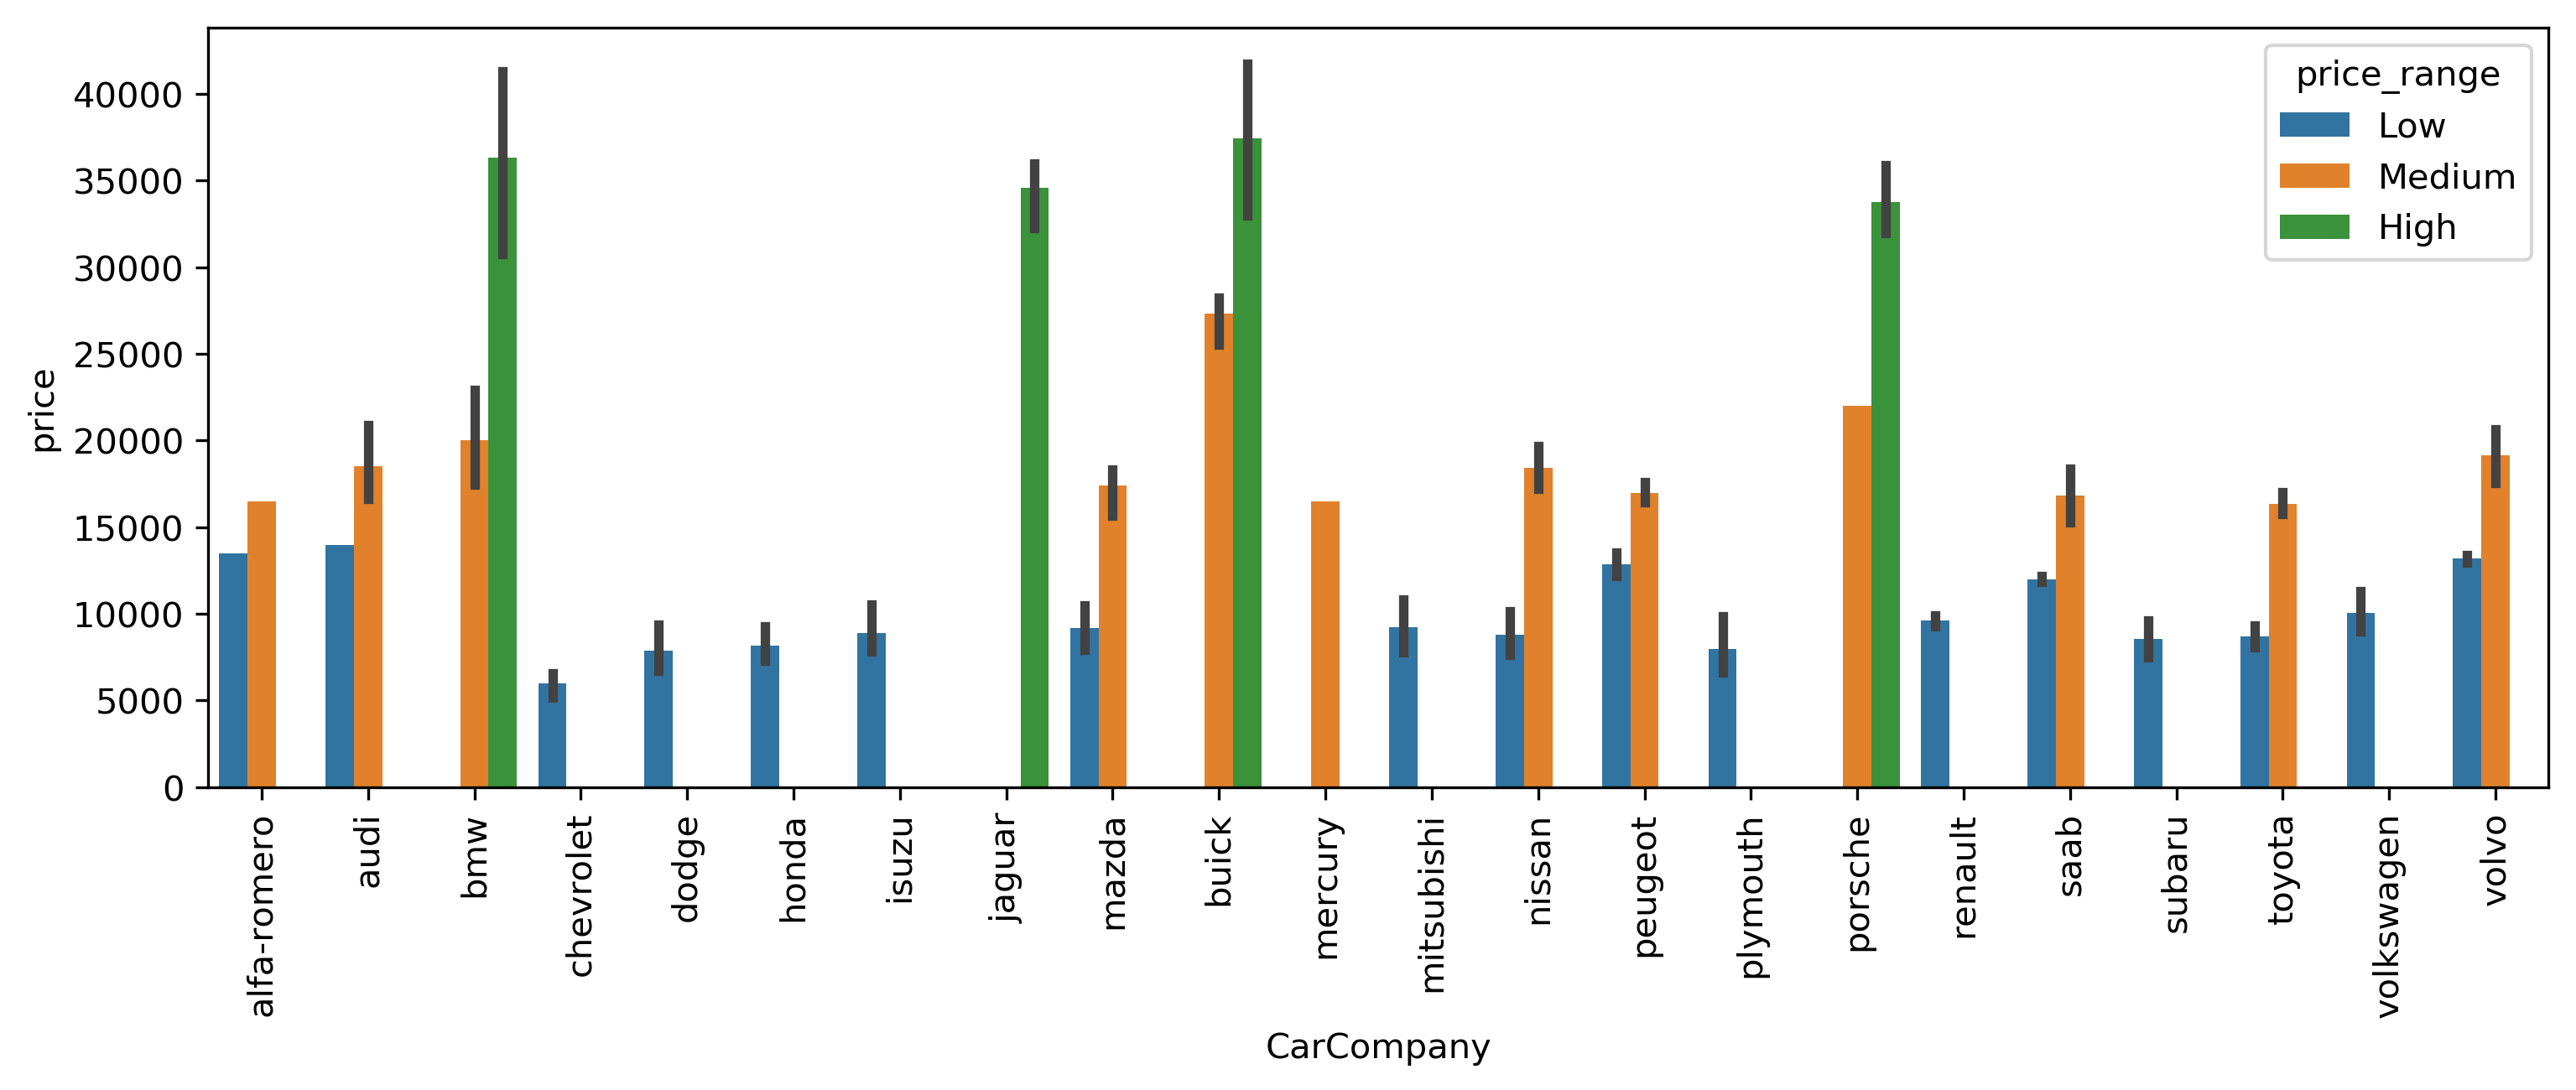

In [35]:
plt.figure(figsize=(12, 4),dpi=300)
sns.barplot(x = 'CarCompany', y = 'price', hue='price_range', data = df_car)
plt.xticks(rotation='vertical')
plt.show()

#### INFERENCE
- Jaguar, buick, bmw and porsche are the high end car companies

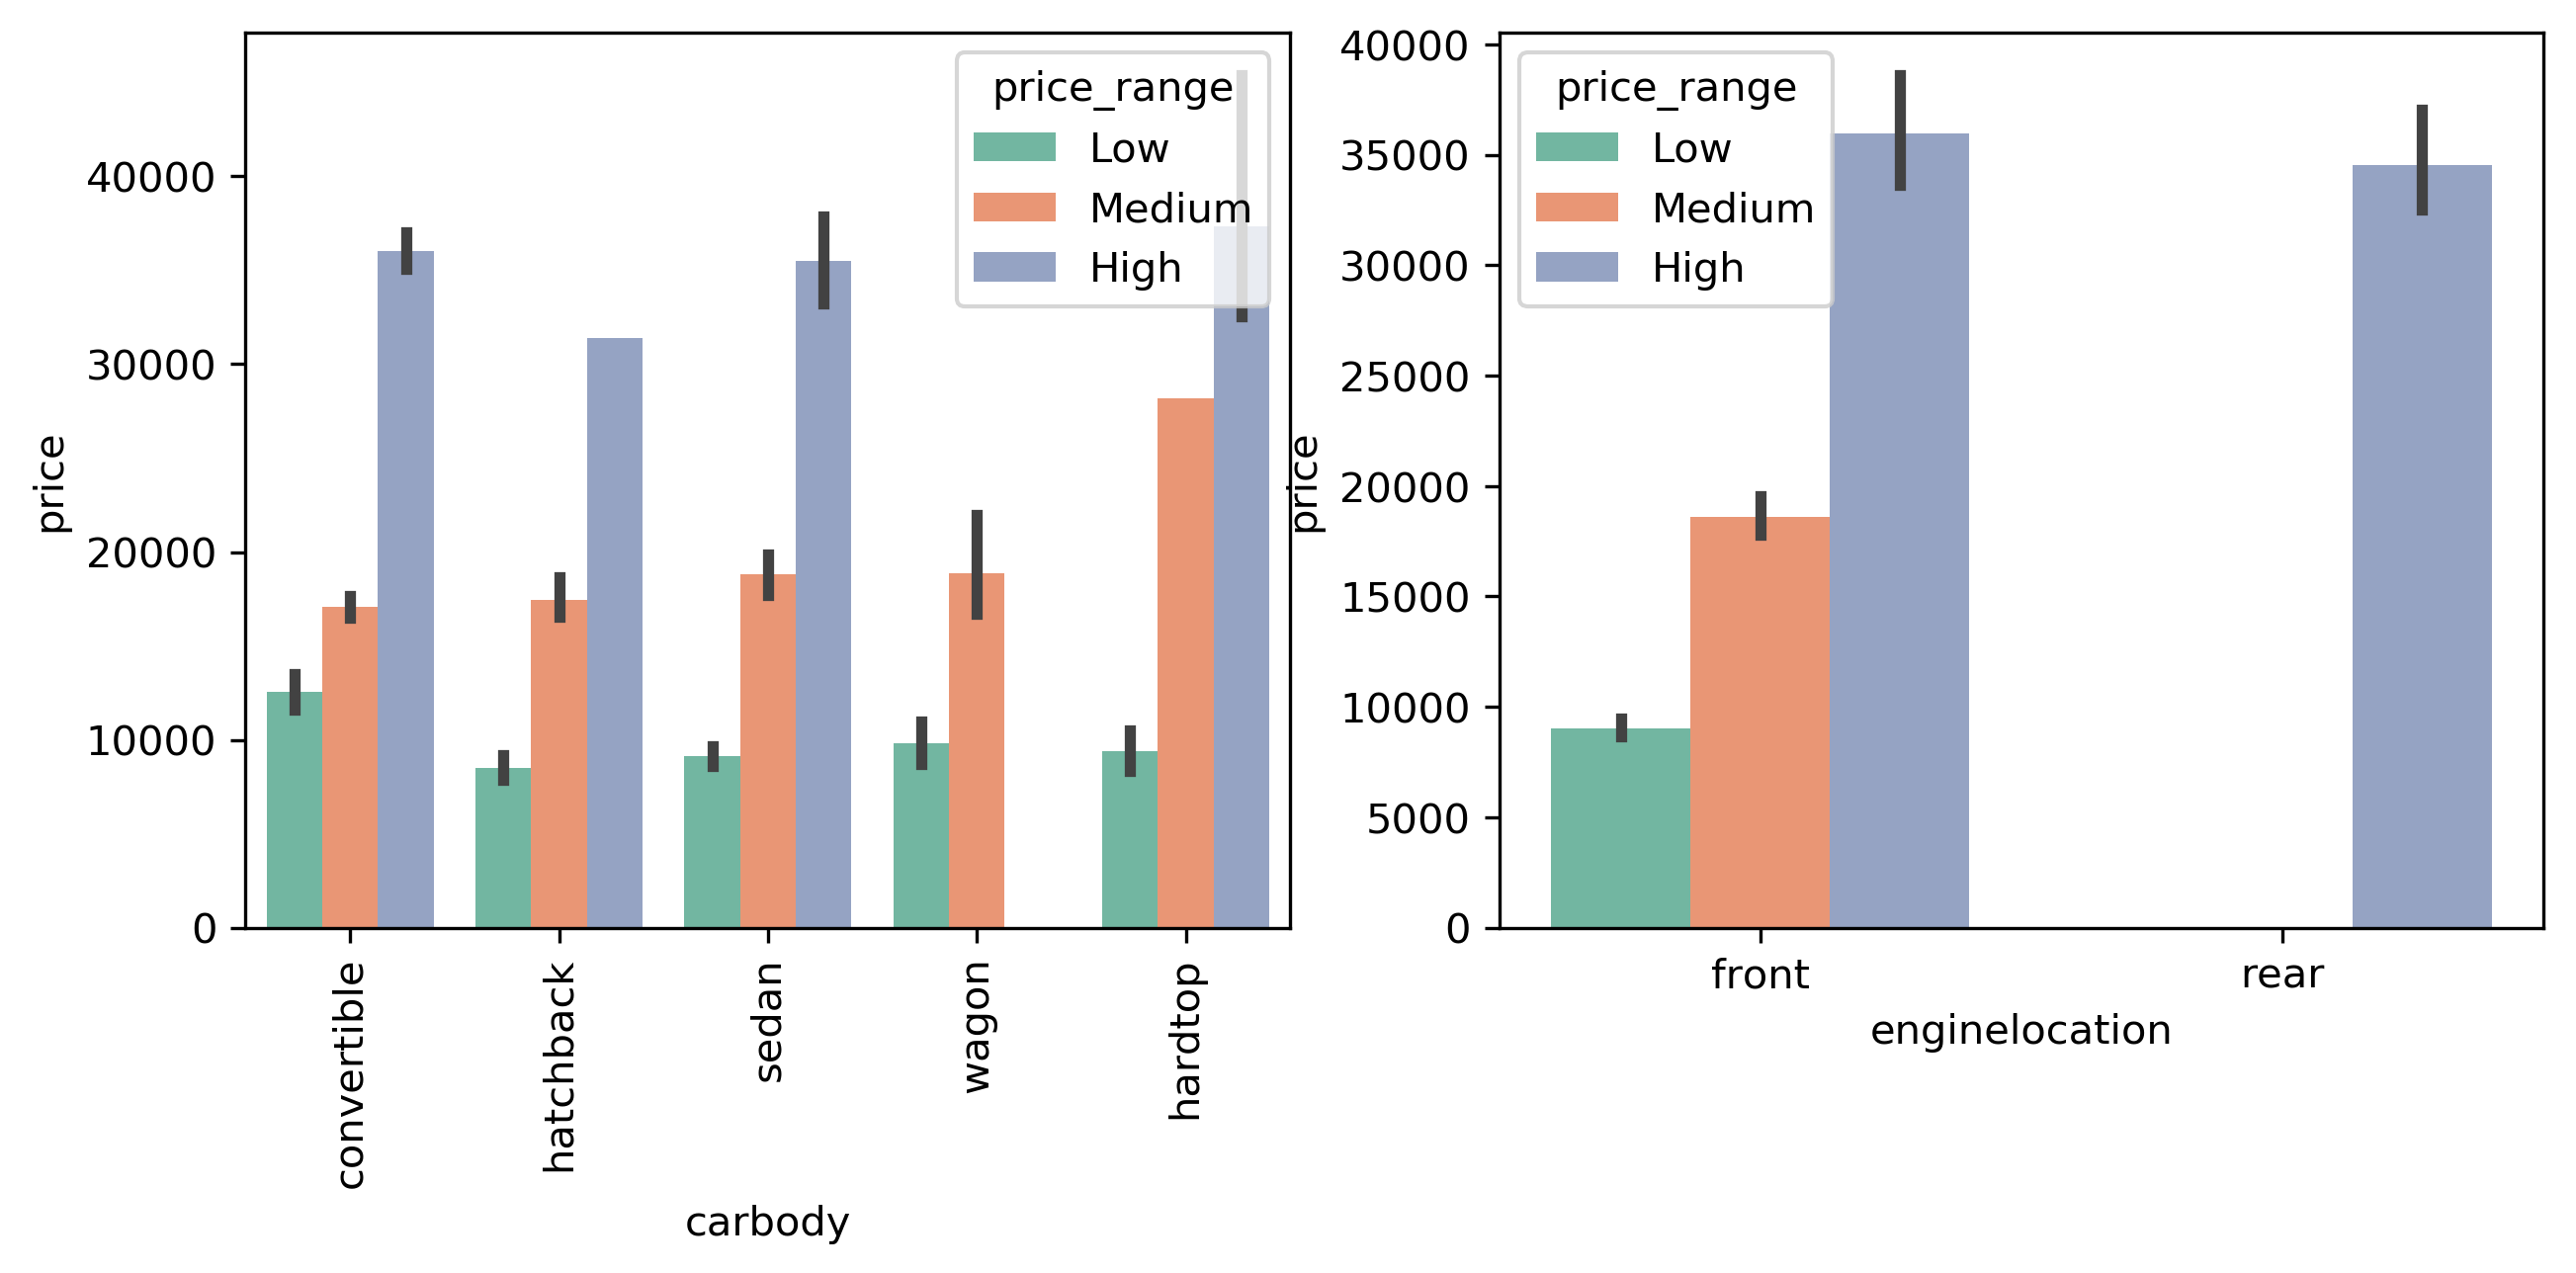

In [36]:
plt.figure(figsize=(10, 4),dpi=300)
plt.subplot(1,2,1)
sns.barplot(x = 'carbody',y = 'price',hue='price_range', data = df_car,palette='Set2')
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
sns.barplot(x = 'enginelocation',y = 'price',hue='price_range', data = df_car,palette='Set2')
plt.show()

- Its pretty clear that wagon is not a high end car body model,other car body types have cars in low, medium and highend
- Engine located at rear is costly, whereas fromt located engone has cars are available in all price range

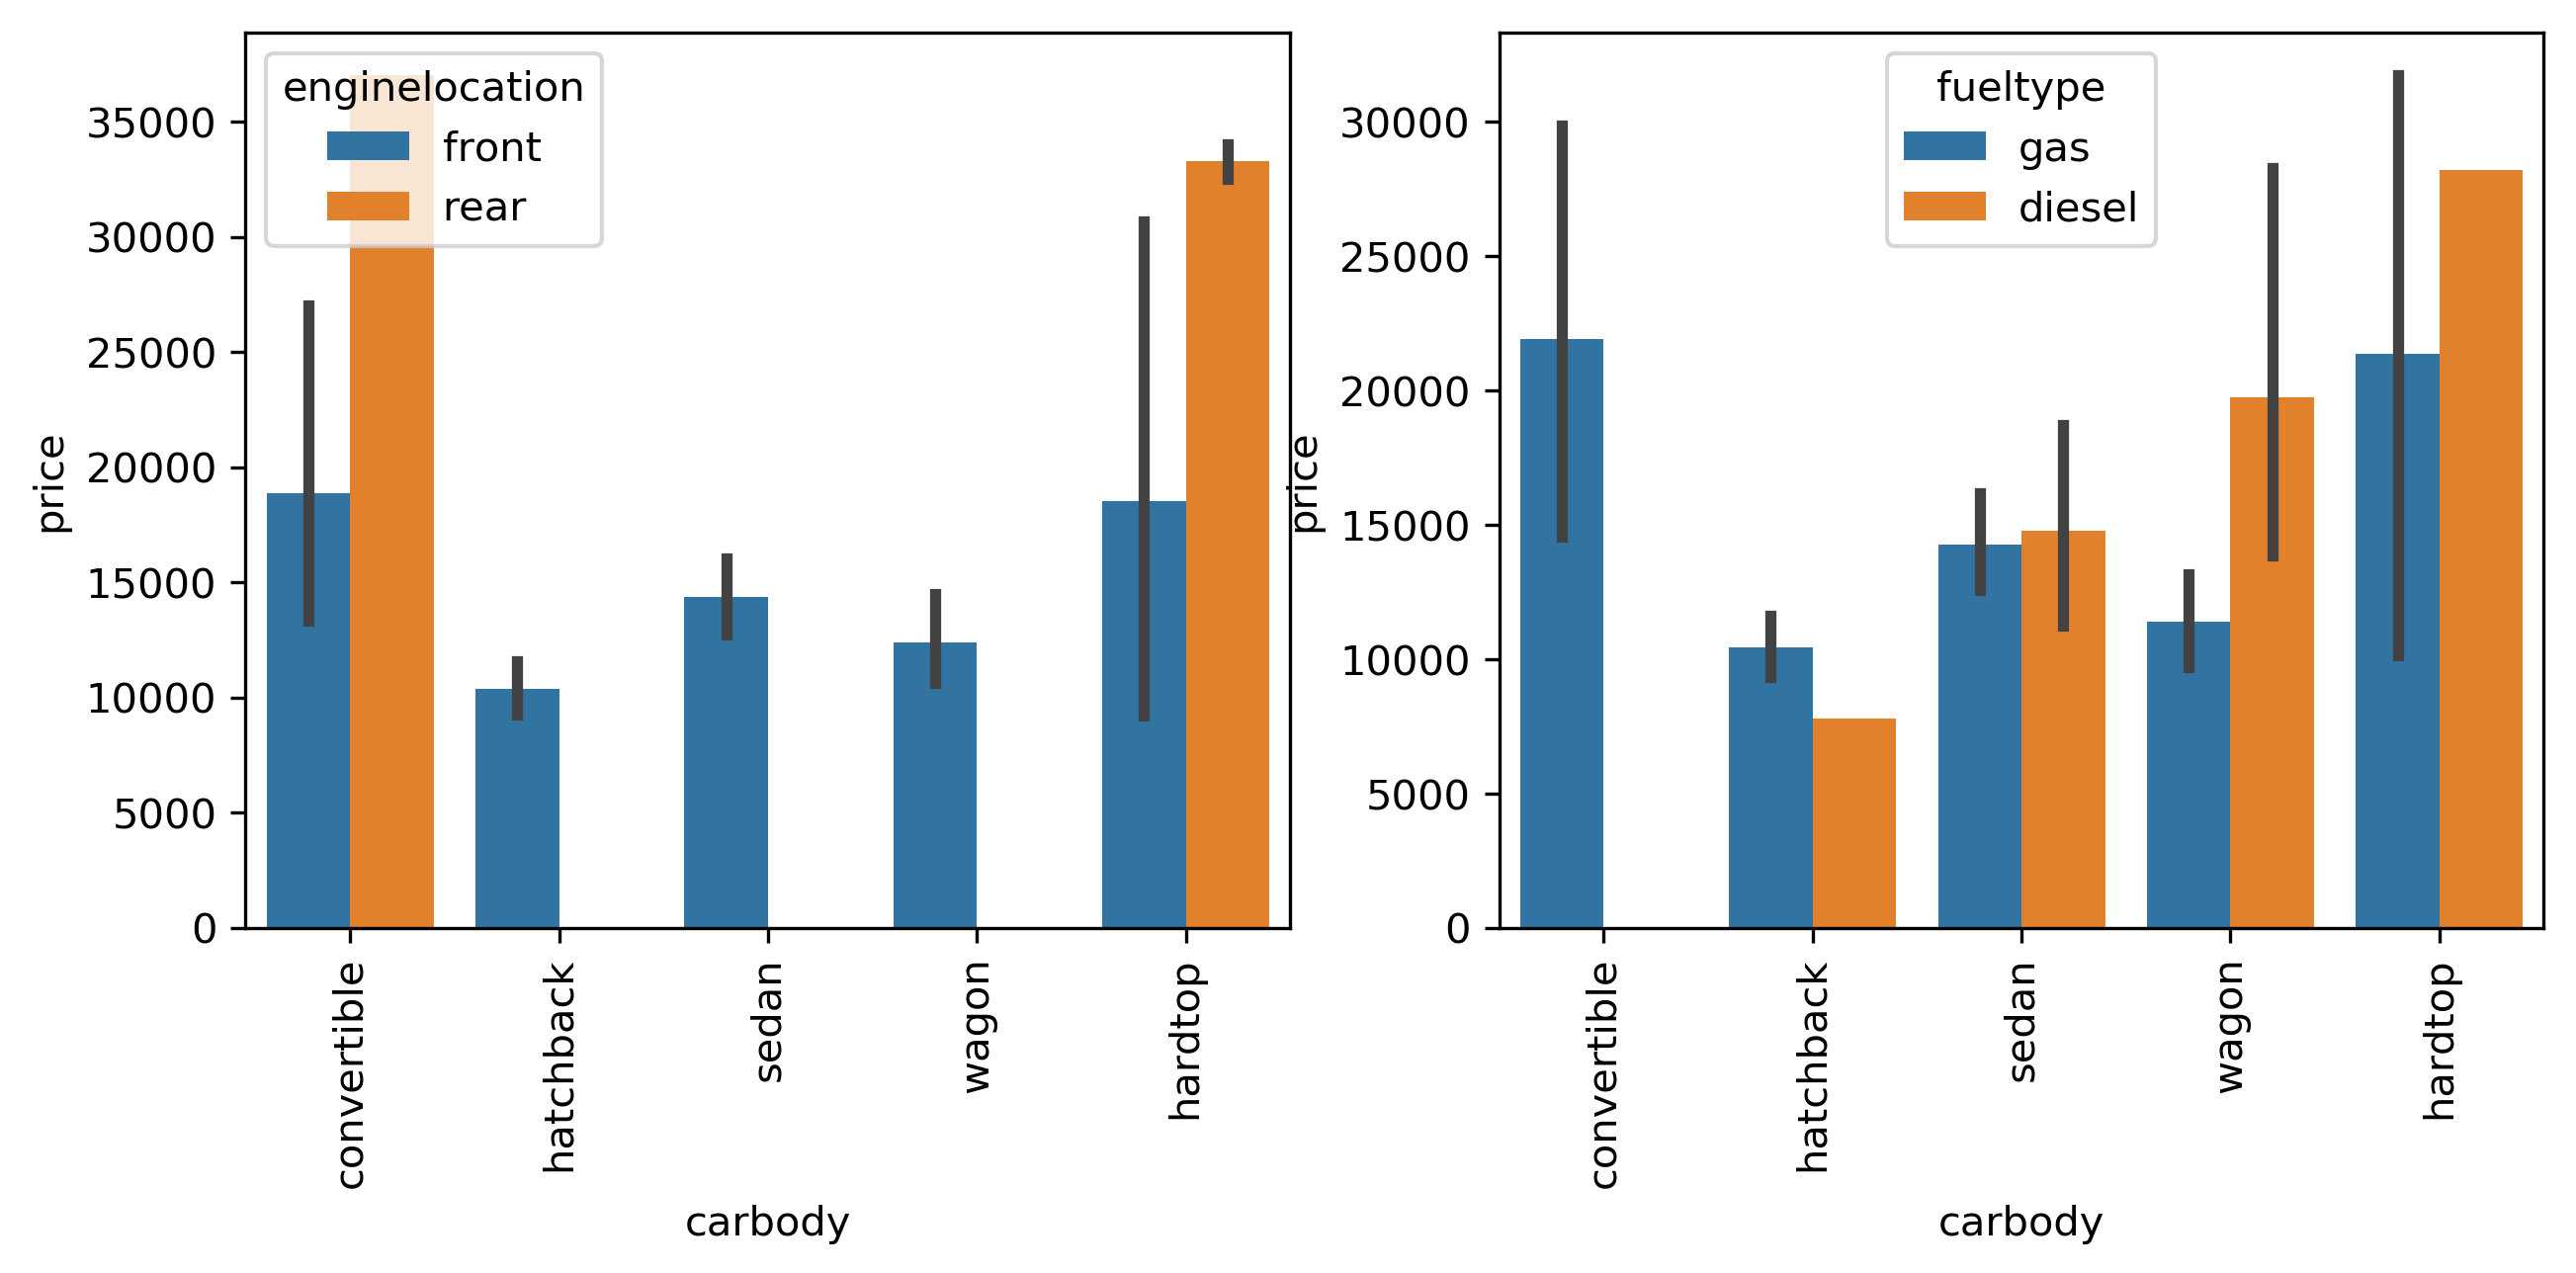

In [37]:
plt.figure(figsize=(10, 4),dpi=300)
plt.subplot(1,2,1)
sns.barplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df_car)
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
sns.barplot(x = 'carbody', y = 'price', hue = 'fueltype', data = df_car)
plt.xticks(rotation='vertical')
plt.show()

- Engine is located at the rear end only with car body type convertible and hardtop
- Convertible has only gas option in fuel type, whereas gas and diesel types are available in other car body types

#### EDA - CONCLUSION:
- After extensive EDA, the below variables seem to impact pricing of the car and can be used for modelling
    - enginesize
    - curbweight
    - horsepower
    - carwidth
    - carlength
    - wheelbase
    - boreratio
    - fueltype
    - carbody
    - CarCompany
    - price_range
    - enginetype
    - enginelocation
    - drivewheel
    - fueleconomy
    - cylindernumber
    - aspiration

### 4. DATA PREPARATION

In [38]:
df_car_linreg = df_car[['price','enginesize','curbweight','horsepower','carwidth','carlength','wheelbase','boreratio',
                        'fueleconomy','fueltype','carbody','CarCompany','price_range','enginetype',
                        'enginelocation','drivewheel','cylindernumber','aspiration']]
print(df_car_linreg.shape)
df_car_linreg.head()

(205, 18)


,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,fueleconomy,fueltype,carbody,CarCompany,price_range,enginetype,enginelocation,drivewheel,cylindernumber,aspiration
0,13495.0,130,2548,111,64.1,168.8,88.6,3.47,23.70,gas,convertible,alfa-romero,Low,dohc,front,rwd,four,std
1,16500.0,130,2548,111,64.1,168.8,88.6,3.47,23.70,gas,convertible,alfa-romero,Medium,dohc,front,rwd,four,std
2,16500.0,152,2823,154,65.5,171.2,94.5,2.68,22.15,gas,hatchback,alfa-romero,Medium,ohcv,front,rwd,six,std
3,13950.0,109,2337,102,66.2,176.6,99.8,3.19,26.70,gas,sedan,audi,Low,ohc,front,fwd,four,std
4,17450.0,136,2824,115,66.4,176.6,99.4,3.19,19.80,gas,sedan,audi,Medium,ohc,front,4wd,five,std


### ENCODING

##### BINARY ENCODING - 'fueltype', 'enginelocation','aspiration' features

In [39]:
df_car_linreg['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [41]:
df_car_linreg['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [42]:
df_car_linreg['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [43]:
df_car_linreg['aspiration'] = df_car_linreg['aspiration'].map({'std':1,'turbo':0})
df_car_linreg['enginelocation'] = df_car_linreg['enginelocation'].map({'front':1,'rear':0})
df_car_linreg['fueltype'] = df_car_linreg['fueltype'].map({'gas':1,'diesel':0})
df_car_linreg.head()

,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,fueleconomy,fueltype,carbody,CarCompany,price_range,enginetype,enginelocation,drivewheel,cylindernumber,aspiration
0,13495.0,130,2548,111,64.1,168.8,88.6,3.47,23.70,1,convertible,alfa-romero,Low,dohc,1,rwd,four,1
1,16500.0,130,2548,111,64.1,168.8,88.6,3.47,23.70,1,convertible,alfa-romero,Medium,dohc,1,rwd,four,1
2,16500.0,152,2823,154,65.5,171.2,94.5,2.68,22.15,1,hatchback,alfa-romero,Medium,ohcv,1,rwd,six,1
3,13950.0,109,2337,102,66.2,176.6,99.8,3.19,26.70,1,sedan,audi,Low,ohc,1,fwd,four,1
4,17450.0,136,2824,115,66.4,176.6,99.4,3.19,19.80,1,sedan,audi,Medium,ohc,1,4wd,five,1


##### CHANGING DATATYPE - 'cylindernumber'

In [44]:
dtype_change = {"cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [45]:
df_car_linreg.replace(dtype_change, inplace=True)
df_car_linreg.head()

,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,fueleconomy,fueltype,carbody,CarCompany,price_range,enginetype,enginelocation,drivewheel,cylindernumber,aspiration
0,13495.0,130,2548,111,64.1,168.8,88.6,3.47,23.70,1,convertible,alfa-romero,Low,dohc,1,rwd,4,1
1,16500.0,130,2548,111,64.1,168.8,88.6,3.47,23.70,1,convertible,alfa-romero,Medium,dohc,1,rwd,4,1
2,16500.0,152,2823,154,65.5,171.2,94.5,2.68,22.15,1,hatchback,alfa-romero,Medium,ohcv,1,rwd,6,1
3,13950.0,109,2337,102,66.2,176.6,99.8,3.19,26.70,1,sedan,audi,Low,ohc,1,fwd,4,1
4,17450.0,136,2824,115,66.4,176.6,99.4,3.19,19.80,1,sedan,audi,Medium,ohc,1,4wd,5,1


In [46]:
df_car_linreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
price             205 non-null float64
enginesize        205 non-null int64
curbweight        205 non-null int64
horsepower        205 non-null int64
carwidth          205 non-null float64
carlength         205 non-null float64
wheelbase         205 non-null float64
boreratio         205 non-null float64
fueleconomy       205 non-null float64
fueltype          205 non-null int64
carbody           205 non-null object
CarCompany        205 non-null object
price_range       205 non-null object
enginetype        205 non-null object
enginelocation    205 non-null int64
drivewheel        205 non-null object
cylindernumber    205 non-null int64
aspiration        205 non-null int64
dtypes: float64(6), int64(7), object(5)
memory usage: 28.9+ KB


##### DUMMY VARIABLES

In [47]:
# category variables
cat_cols = list(df_car_linreg.select_dtypes(include=['object']).columns)

In [48]:
print(cat_cols)

['carbody', 'CarCompany', 'price_range', 'enginetype', 'drivewheel']


In [49]:
df_cat = pd.get_dummies(df_car_linreg[cat_cols],drop_first=True)
df_car_linreg= pd.concat([df_car_linreg,df_cat],axis=1)
df_car_linreg.drop(cat_cols,axis=1,inplace=True)
print(df_car_linreg.shape)
df_car_linreg.head()

(205, 48)


,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,fueleconomy,fueltype,enginelocation,cylindernumber,aspiration,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,CarCompany_mercury,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price_range_Low,price_range_Medium,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd
0,13495.0,130,2548,111,64.1,168.8,88.6,3.47,23.70,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,16500.0,130,2548,111,64.1,168.8,88.6,3.47,23.70,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,16500.0,152,2823,154,65.5,171.2,94.5,2.68,22.15,1,1,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,13950.0,109,2337,102,66.2,176.6,99.8,3.19,26.70,1,1,4,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,17450.0,136,2824,115,66.4,176.6,99.4,3.19,19.80,1,1,5,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


#### TRAIN-TEST SPLIT

In [50]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(df_car_linreg,train_size=0.7, test_size=0.3,random_state=100)

In [51]:
print(df_train.shape)
print(df_test.shape)

(143, 48)
(62, 48)


#### RESCALING THE FEATURES - using MinMax scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
#applying scaler to all variables except dummy variables
num_vars = ['wheelbase','carlength','carwidth','curbweight','cylindernumber','aspiration',
            'enginesize','boreratio','horsepower','fueleconomy','fueltype','enginelocation','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\DHARU\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,fueleconomy,fueltype,enginelocation,cylindernumber,aspiration,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,CarCompany_mercury,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price_range_Low,price_range_Medium,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd
122,0.068818,0.139623,0.272692,0.083333,0.291667,0.426016,0.244828,0.230159,0.530864,1.0,1.0,0.2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
125,0.466890,0.339623,0.500388,0.395833,0.666667,0.452033,0.272414,1.000000,0.213992,1.0,1.0,0.2,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
166,0.122110,0.139623,0.314973,0.266667,0.308333,0.448780,0.272414,0.444444,0.344307,1.0,1.0,0.2,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0.314446,0.260377,0.411171,0.262500,0.316667,0.450407,0.068966,0.626984,0.244170,1.0,1.0,0.2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
199,0.382131,0.260377,0.647401,0.475000,0.575000,0.775610,0.610345,0.746032,0.122085,1.0,1.0,0.2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1


In [54]:
df_train.describe()

,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,fueleconomy,fueltype,enginelocation,cylindernumber,aspiration,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,CarCompany_mercury,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price_range_Low,price_range_Medium,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.241351,0.407878,0.227302,0.461655,0.525476,0.411141,0.497946,0.358265,0.909091,0.993007,0.240559,0.818182,0.020979,0.342657,0.475524,0.132867,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.692308,0.237762,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.594406,0.349650
std,0.215682,0.154619,0.211269,0.165511,0.184517,0.204848,0.205581,0.207140,0.185980,0.288490,0.083624,0.115818,0.387050,0.143818,0.476266,0.501156,0.340624,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.463161,0.427209,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.492733,0.478536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.135849,0.245539,0.091667,0.304167,0.399187,0.272414,0.305556,0.198903,1.000000,1.000000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.184906,0.355702,0.191667,0.425000,0.502439,0.341379,0.500000,0.344307,1.000000,1.000000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.313479,0.301887,0.559542,0.283333,0.550000,0.669919,0.503448,0.682540,0.512346,1.000000,1.000000,0.200000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

- We can see that the below variables are highly correlated with price
    1. 

#### Dividing data into X and y sets for model building 

In [55]:
y_train = df_train.pop('price')
X_train = df_train

In [56]:
X_train.head()

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,fueleconomy,fueltype,enginelocation,cylindernumber,aspiration,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,CarCompany_mercury,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price_range_Low,price_range_Medium,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd
122,0.139623,0.272692,0.083333,0.291667,0.426016,0.244828,0.230159,0.530864,1.0,1.0,0.2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
125,0.339623,0.500388,0.395833,0.666667,0.452033,0.272414,1.000000,0.213992,1.0,1.0,0.2,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
166,0.139623,0.314973,0.266667,0.308333,0.448780,0.272414,0.444444,0.344307,1.0,1.0,0.2,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0.260377,0.411171,0.262500,0.316667,0.450407,0.068966,0.626984,0.244170,1.0,1.0,0.2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
199,0.260377,0.647401,0.475000,0.575000,0.775610,0.610345,0.746032,0.122085,1.0,1.0,0.2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1


### 4.  BUILDING LINEAR MODEL
- We will be using a combination of auto and manual approach
- Auto approach will be using RFE

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Running RFE with output no of variables which is equal to 10
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('enginesize', False, 3),
 ('curbweight', True, 1),
 ('horsepower', False, 21),
 ('carwidth', True, 1),
 ('carlength', True, 1),
 ('wheelbase', False, 23),
 ('boreratio', False, 18),
 ('fueleconomy', False, 20),
 ('fueltype', False, 22),
 ('enginelocation', True, 1),
 ('cylindernumber', False, 11),
 ('aspiration', False, 4),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('CarCompany_audi', False, 17),
 ('CarCompany_bmw', True, 1),
 ('CarCompany_buick', False, 25),
 ('CarCompany_chevrolet', False, 14),
 ('CarCompany_dodge', False, 8),
 ('CarCompany_honda', False, 12),
 ('CarCompany_isuzu', False, 31),
 ('CarCompany_jaguar', False, 24),
 ('CarCompany_mazda', False, 13),
 ('CarCompany_mercury', False, 33),
 ('CarCompany_mitsubishi', False, 6),
 ('CarCompany_nissan', False, 15),
 ('CarCompany_peugeot', True, 1),
 ('CarCompany_plymouth', False, 9),
 ('CarCompany_porsche', True, 1),
 ('CarCompany_renault', False, 

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'carwidth', 'carlength', 'enginelocation', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'CarCompany_bmw', 'CarCompany_peugeot', 'CarCompany_porsche', 'price_range_Low', 'price_range_Medium', 'enginetype_dohcv', 'enginetype_l', 'enginetype_rotor'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [60]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,curbweight,carwidth,carlength,enginelocation,carbody_hatchback,carbody_sedan,carbody_wagon,CarCompany_bmw,CarCompany_peugeot,CarCompany_porsche,price_range_Low,price_range_Medium,enginetype_dohcv,enginetype_l,enginetype_rotor
122,0.272692,0.291667,0.426016,1.0,0,1,0,0,0,0,1,0,0,0,0
125,0.500388,0.666667,0.452033,1.0,1,0,0,0,0,1,0,1,0,0,0
166,0.314973,0.308333,0.448780,1.0,1,0,0,0,0,0,1,0,0,0,0
1,0.411171,0.316667,0.450407,1.0,0,0,0,0,0,0,0,1,0,0,0
199,0.647401,0.575000,0.775610,1.0,0,0,1,0,0,0,0,1,0,0,0


In [61]:
import statsmodels.api as sm  

def lin_model(X_train,y_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit()
    print(lm.summary())

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

 - p(F-statistic) denotes the overall fit of the model and it should be less than 0.05
 - goodness or the extent of fit is assessed by  R-squared or adjusted R-squared. Difference between r2 and adjusted r2 should be less than 0.05 (5%)
 - Recommended p-value for a model should be less than 0.05 & vif should be less than 5. 
 - Higher the p-value, the variable is insignificant.
 - Higher the vif, multicollinearity exists in the model.
 - coefficients for the features should not be zero.

##### MODEL 1

In [63]:
X_train_1 = lin_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     283.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.16e-90
Time:                        16:25:10   Log-Likelihood:                 270.03
No. Observations:                 143   AIC:                            -508.1
Df Residuals:                     127   BIC:                            -460.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4386      0

In [64]:
vif(X_train_rfe)

,Features,VIF
3,enginelocation,113.95
2,carlength,69.73
1,carwidth,54.94
0,curbweight,45.60
10,price_range_Low,40.15
5,carbody_sedan,13.87
8,CarCompany_peugeot,10.81
13,enginetype_l,9.96
4,carbody_hatchback,9.80
11,price_range_Medium,8.70


- OBSERVATION:
    - p(F-statistic is practically zero - overall fit is good)
    - r2 and adjusted r2 are very good
    - 'enginelocation' has p-value(0.08) > 0.05, means the variable is insignificant and also a very high vif value. Hence dropping the same.

In [65]:
X_train_1 = X_train_rfe.drop(['enginelocation'],axis=1)

##### MODEL 2

In [66]:
X_train_2 = lin_model(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     298.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.99e-90
Time:                        16:25:17   Log-Likelihood:                 268.38
No. Observations:                 143   AIC:                            -506.8
Df Residuals:                     128   BIC:                            -462.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3551      0

In [67]:
vif(X_train_1)

,Features,VIF
2,carlength,68.40
1,carwidth,50.26
0,curbweight,38.54
4,carbody_sedan,12.10
9,price_range_Low,11.31
7,CarCompany_peugeot,10.02
12,enginetype_l,9.61
3,carbody_hatchback,8.57
5,carbody_wagon,4.43
10,price_range_Medium,4.08


- OBSERVATION:
    - p(F-statistic is practically zero - overall fit is good)
    - r2 and adjusted r2 are very good
    - p-value for all the variables are less than 0.05, means all variables are significant
    - But 'carlength' has a very high vif value indicating multicollinearity in the model.Hence dropping 'carlength'

In [68]:
X_train_2 = X_train_1.drop(['carlength'],axis=1)

##### MODEL 3

In [69]:
X_train_3 = lin_model(X_train_2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     309.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.96e-90
Time:                        16:25:19   Log-Likelihood:                 265.16
No. Observations:                 143   AIC:                            -502.3
Df Residuals:                     129   BIC:                            -460.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3585      0

In [70]:
vif(X_train_2)

,Features,VIF
1,carwidth,38.80
0,curbweight,27.19
3,carbody_sedan,11.64
8,price_range_Low,10.36
6,CarCompany_peugeot,9.94
11,enginetype_l,9.56
2,carbody_hatchback,8.54
4,carbody_wagon,4.21
9,price_range_Medium,3.89
10,enginetype_dohcv,1.67


- OBSERVATION:
    - p(F-statistic is practically zero - overall fit is good)
    - r2 and adjusted r2 are very good
    - p-value for all the variablesis lesss than 0.05, means all variables are significant
    - But 'carwidth' and 'curbweight' has a very high vif value indicating multicollinearity in the model. 
    - Deciding to first drop 'curbweight' as carwidth seems to be more important feature than curbweight.

In [71]:
X_train_3 = X_train_2.drop(['curbweight'],axis=1)

##### MODEL 4

In [72]:
X_train_4 = lin_model(X_train_3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     217.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.61e-80
Time:                        16:25:22   Log-Likelihood:                 235.02
No. Observations:                 143   AIC:                            -444.0
Df Residuals:                     130   BIC:                            -405.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4797      0

- OBSERVATION:
    - p(F-statistic is practically zero - overall fit is good)
    - r2 and adjusted r2 are very good
    - p-value for 'enginetype_l' is more than 0.05. Dropping it

In [73]:
X_train_4 = X_train_3.drop(['enginetype_l'],axis=1)

##### MODEL 5

In [74]:
X_train_5 = lin_model(X_train_4,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     234.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.88e-80
Time:                        16:25:24   Log-Likelihood:                 233.53
No. Observations:                 143   AIC:                            -443.1
Df Residuals:                     131   BIC:                            -407.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4924      0

In [75]:
vif(X_train_4)

,Features,VIF
2,carbody_sedan,11.48
7,price_range_Low,9.87
0,carwidth,8.70
1,carbody_hatchback,8.34
3,carbody_wagon,4.04
8,price_range_Medium,3.88
9,enginetype_dohcv,1.62
6,CarCompany_porsche,1.59
4,CarCompany_bmw,1.22
5,CarCompany_peugeot,1.22


- OBSERVATION:
    - p(F-statistic is practically zero - overall fit is good)
    - r2 and adjusted r2 are very good
    - p-value for all the variables is less than 0.05, means all variables are significant
    - But 'carbody_sedan' has a high vif value indicating multicollinearity in the model. Dropping the same

In [76]:
X_train_5 = X_train_4.drop(['carbody_sedan'],axis=1)

##### MODEL 6

In [77]:
X_train_6 = lin_model(X_train_5,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     235.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.48e-79
Time:                        16:25:26   Log-Likelihood:                 226.81
No. Observations:                 143   AIC:                            -431.6
Df Residuals:                     132   BIC:                            -399.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4560      0

In [78]:
vif(X_train_5)

,Features,VIF
0,carwidth,4.84
6,price_range_Low,3.91
7,price_range_Medium,2.82
1,carbody_hatchback,1.97
8,enginetype_dohcv,1.61
5,CarCompany_porsche,1.57
2,carbody_wagon,1.32
4,CarCompany_peugeot,1.21
3,CarCompany_bmw,1.13
9,enginetype_rotor,1.10


- OBSERVATION:
    - p(F-statistic is practically zero - overall fit is good)
    - r2 and adjusted r2 are very good
    - Eventhough 'carbody_hatchback'(0.09) and 'carbody_wagon" (0.54) has p-value more than 0.05, p-value for 'carbody_wagon' is 0.54. Hence dropping 'carbody_wagon'
    - vif for all the variables looks fine

In [79]:
X_train_6 = X_train_5.drop(['carbody_wagon'],axis=1)

##### MODEL 7

In [80]:
X_train_7 = lin_model(X_train_6,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     262.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.96e-80
Time:                        16:25:29   Log-Likelihood:                 226.60
No. Observations:                 143   AIC:                            -433.2
Df Residuals:                     133   BIC:                            -403.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4561      0

In [81]:
vif(X_train_6)

,Features,VIF
0,carwidth,4.84
5,price_range_Low,3.60
6,price_range_Medium,2.75
1,carbody_hatchback,1.81
7,enginetype_dohcv,1.60
4,CarCompany_porsche,1.57
3,CarCompany_peugeot,1.20
2,CarCompany_bmw,1.13
8,enginetype_rotor,1.10


- OBSERVATION:
    - 'carbody_hatchback' has p-value of 0.053,which is on the boderline.other variables are significant.
    - vif for all the variables looks fine
    - r2 and adjusted r2 looks good
    - p(f-statistic) is also practically zero
    - Dropping 'carbody_hatchback' to check if there is any change in the model.

In [82]:
X_train_7 = X_train_6.drop(['carbody_hatchback'],axis=1)

##### MODEL 8

In [83]:
X_train_8 = lin_model(X_train_7,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     288.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.47e-80
Time:                        16:25:32   Log-Likelihood:                 224.58
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                     134   BIC:                            -404.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4491      0

In [84]:
vif(X_train_7)

,Features,VIF
0,carwidth,4.82
4,price_range_Low,2.91
5,price_range_Medium,2.61
6,enginetype_dohcv,1.58
3,CarCompany_porsche,1.55
2,CarCompany_peugeot,1.17
1,CarCompany_bmw,1.12
7,enginetype_rotor,1.03


- OBSERVATION:
    - dropping 'carbody_hatchback' has made 'enginetype_rotor' insignificant.
    - vif for all the variables looks fine
    - No big change in r2 and adjusted r2 and it looks good
    - p(f-statistic) is also practically zero
    - Dropping 'enginetype_rotor' as its insignificant

In [85]:
X_train_8 = X_train_7.drop(['enginetype_rotor'],axis=1)

#### MODEL 9

In [86]:
X_train_9 = lin_model(X_train_8,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     325.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.93e-81
Time:                        16:25:35   Log-Likelihood:                 223.17
No. Observations:                 143   AIC:                            -430.3
Df Residuals:                     135   BIC:                            -406.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4480      0

In [87]:
vif(X_train_8)

,Features,VIF
0,carwidth,4.82
4,price_range_Low,2.89
5,price_range_Medium,2.60
6,enginetype_dohcv,1.58
3,CarCompany_porsche,1.55
2,CarCompany_peugeot,1.17
1,CarCompany_bmw,1.12


- OBSERVATION:
    - r2 and adjusted r2 looks good
    - p(f-statistic) is also practically zero
    - all variables are significant
    - vif for all the variables looks fine
    - Model looks good with below features 
        - carwidth
        - price_range_Low
        - price_range_Medium
        - enginetype_dohcv
        - CarCompany_porsche
        - CarCompany_peugeot
        - CarCompany_bmw
    -Leaving 'CarCompany_bmw' & retaining other predictors to see if there is any impact on the model

#### MODEL 10

In [117]:
X_train_updated = df_train[['carwidth','price_range_Low','price_range_Medium','enginetype_dohcv','CarCompany_porsche',
                    'CarCompany_peugeot']]

In [118]:
X_train_lm = sm.add_constant(X_train_updated)
lr_new = sm.OLS(y_train, X_train_lm).fit()

In [119]:
print(lr_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     291.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.25e-75
Time:                        16:31:18   Log-Likelihood:                 204.82
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     136   BIC:                            -374.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5296      0

In [120]:
vif(X_train_updated)

,Features,VIF
0,carwidth,4.72
1,price_range_Low,2.86
2,price_range_Medium,2.58
3,enginetype_dohcv,1.58
4,CarCompany_porsche,1.55
5,CarCompany_peugeot,1.15


- OBSERVATION:
    - Removing 'CarCompany_bmw' has not impacted the model much.
    - all variables are stil significant
    - vif for all the variables less than 5 and looks fine
    - R2 is 0.928, means around 93% variance is explained by the model
    - r2 and adjusted r2 are very near.
    - p(f-statistic) is also practically zero,means overall fit of the model is good.
    - Model looks good with below features 
        - carwidth
        - price_range_Low
        - price_range_Medium
        - enginetype_dohcv
        - CarCompany_porsche
        - CarCompany_peugeot
- Hence we can make predictions and look for residual patterns with this model.

### 5. RESIDUAL ANALYSIS ON TRAIN DATA

In [121]:
y_train_pred = lr_new.predict(X_train_lm)

In [122]:
residuals= (y_train - y_train_pred)

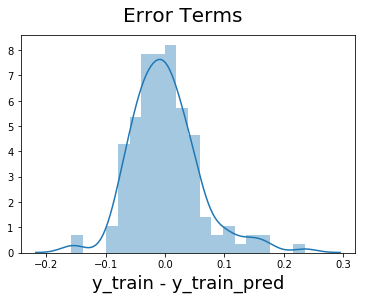

In [123]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('y_train - y_train_pred', fontsize = 18)                         
plt.show()

- Residuals are distributed normally with mean 0. Hence the assumption is satisfied.

In [95]:
X_train_lm.head()

,const,carwidth,CarCompany_peugeot,CarCompany_porsche,price_range_Low,price_range_Medium,enginetype_dohcv
122,1.0,0.291667,0,0,1,0,0
125,1.0,0.666667,0,1,0,1,0
166,1.0,0.308333,0,0,1,0,0
1,1.0,0.316667,0,0,0,1,0
199,1.0,0.575000,0,0,0,1,0


### 6. MAKING PREDICTIONS ON TEST SET USING <font color = blue> MODEL 10 </font>  & MODEL EVALUATION

In [96]:
#applying scaler to all variables except dummy variables
num_vars = ['wheelbase','carlength','carwidth','curbweight','cylindernumber','aspiration',
            'enginesize','boreratio','horsepower','fueleconomy','fueltype','enginelocation','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [97]:
df_test.describe()

,price,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,fueleconomy,fueltype,enginelocation,cylindernumber,aspiration,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,CarCompany_mercury,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price_range_Low,price_range_Medium,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000
mean,0.239439,0.265673,0.428470,0.248858,0.480376,0.559481,0.437764,0.556580,0.344661,0.887097,0.967742,0.232258,0.822581,0.080645,0.338710,0.451613,0.096774,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.677419,0.241935,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.564516,0.419355
std,0.233076,0.162820,0.179488,0.163376,0.165440,0.189947,0.212861,0.228484,0.175037,0.319058,0.178127,0.088288,0.385142,0.274512,0.477134,0.501716,0.298064,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.471280,0.431751,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.499868,0.497482
min,0.007763,0.067925,0.128394,0.016667,0.183333,0.056911,0.000000,-0.111111,0.002743,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.092342,0.177358,0.305275,0.107292,0.358333,0.459350,0.313793,0.404762,0.192387,1.000000,1.000000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.158991,0.226415,0.406129,0.218750,0.441667,0.547967,0.387931,0.563492,0.326475,1.000000,1.000000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,0.317243,0.316038,0.564876,0.295833,0.516667,0.719919,0.570690,0.746032,0.451303,1.000000,1.000000,0.200000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,1.112855,0.932075,0.935609,0.662500,0.975000,1.089431,1.182759,0.888889,0.747599,1.000000,1.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000

#### DIVIDING INTO X_test & y_test

In [98]:
y_test = df_test.pop('price')
X_test = df_test

In [124]:
X_test_new = X_test[['carwidth','price_range_Low','price_range_Medium','enginetype_dohcv','CarCompany_porsche',
                    'CarCompany_peugeot']]

In [125]:
X_test_new = sm.add_constant(X_test_new)

In [126]:
X_test_new.head()

,const,carwidth,price_range_Low,price_range_Medium,enginetype_dohcv,CarCompany_porsche,CarCompany_peugeot
160,1.0,0.341667,1,0,0,0,0
186,1.0,0.433333,1,0,0,0,0
59,1.0,0.516667,1,0,0,0,0
165,1.0,0.308333,1,0,0,0,0
140,1.0,0.291667,1,0,0,0,0


In [127]:
# Making  using model 10

y_pred_test = lr_new.predict(X_test_new)

In [128]:
# checking r2 for TEST set
from sklearn.metrics import r2_score
r_squared_test = r2_score(y_test, y_pred_test)
print('r_square_value for TEST SET :',r_squared_test.round(2))

r_square_value for TEST SET : 0.92


In [129]:
#Returns the mean squared error; we'll take a square root
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_test))

0.06565764925404116

In [130]:
# checking r2 for TRAIN set
r_squared_train = r2_score(y_train, y_train_pred)
print('r_square_value for train SET :',r_squared_train.round(2))

r_square_value for train SET : 0.93


#### R-SQUARED for TRAIN set is 0.93 & TEST set is 0.92. DIFFERENCE IS LESS THAN 0.05

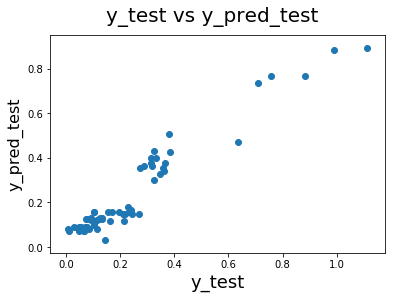

In [132]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)   
plt.show()

In [134]:
#final model summary
print(lr_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     291.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.25e-75
Time:                        16:33:32   Log-Likelihood:                 204.82
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     136   BIC:                            -374.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5296      0

- R-squared and adjusted R-squared which tells us the extent of fit is 0.928 and 0.925. around 92% variance is explained
- F-stat is 291.1 and p(F-stat), which tells us abount overall model fit is practically zero
- p-values for all the variables are less than 0.05, means all the predictor variables are significant
- vif for all the predictors is less than 5, which means no multicollinearity present

#### EQUATION OF BEST FIT LINE:

$ price = (0.372 * carwidth)+(0.09 * CarCompany-porsche)-(0.05 * CarCompany-peugeot)-(0.565 * price-range-Low)
            -(0.367 * price-range-Medium) - (o.265 * enginetype-dohcv) + constant(0.529) $

 - There is still scope for improvement in the model using additional predictors